# Traffic Sign Recognition Classifier

In [1]:
%matplotlib inline

# Load pickled data
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pandas.io.parsers import read_csv


## Loading datasets
training_file = r"C:\Users\Vipin Vashisth\Downloads\traffic_sign_data\train.p"
validation_file=r"C:\Users\Vipin Vashisth\Downloads\traffic_sign_data\valid.p"
testing_file = r"C:\Users\Vipin Vashisth\Downloads\traffic_sign_data\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

sign_names = read_csv(r"C:\Users\Vipin Vashisth\Downloads\traffic_sign_data\signnames.csv").values[:, 1]

#Separating features and labels
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


## Dataset Summary & Exploration

In [2]:
# Number of training examples
n_train = X_train.shape[0]
# Number of validation examples
n_validation = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]
# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
# Unique classes/labels there are in the dataset.
classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(class_counts)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Histogram of class distrubtions :-

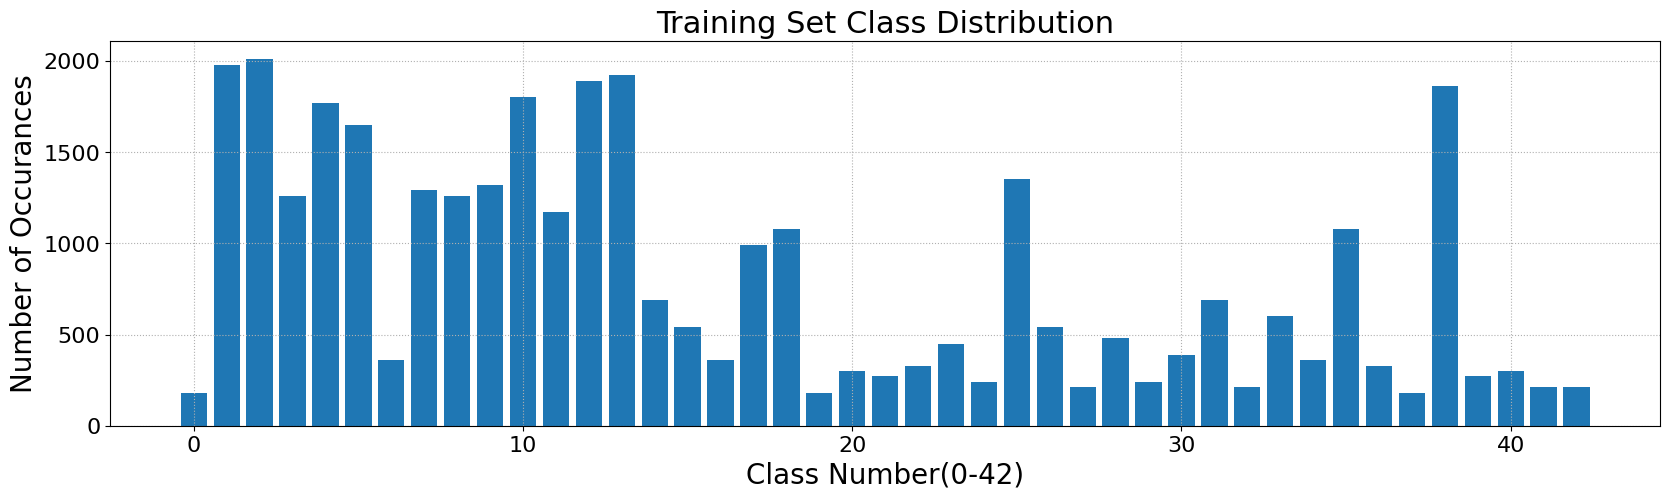

In [3]:
#Plot to show frequencies of data for Training dataset
plt.figure(0, figsize = (20,5))
unique_train, counts_train = np.unique(y_train, return_counts = True)
plt.bar(unique_train, counts_train)

plt.title('Training Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


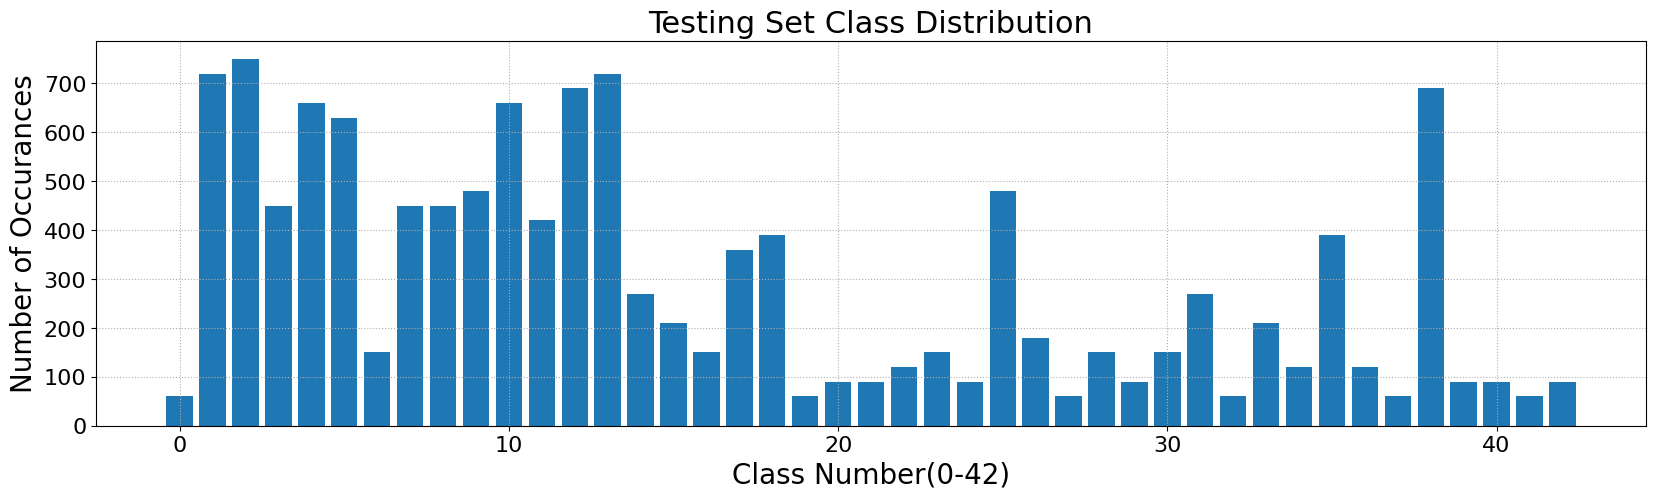

In [4]:
#Plot to show frequencies of data for Testing dataset
plt.figure(0, figsize = (20,5))
unique_test, counts_test = np.unique(y_test, return_counts = True)
plt.bar(unique_test, counts_test)

plt.title('Testing Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


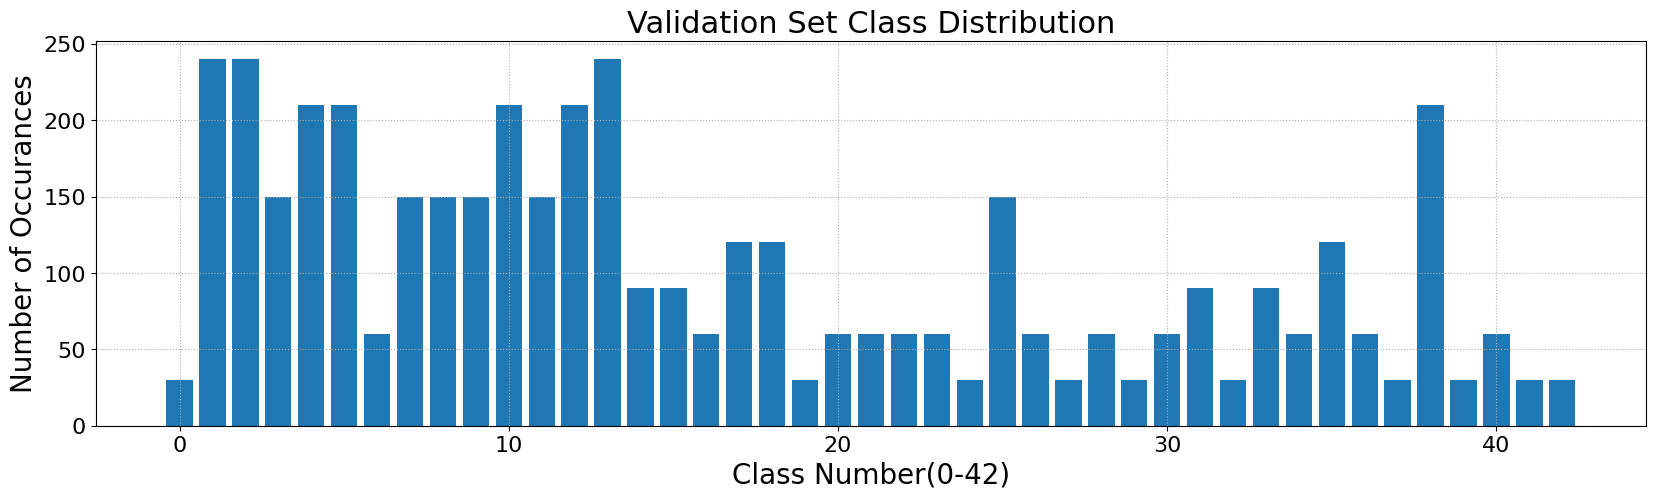

In [5]:
#Plot to show frequencies of data for Validation dataset
plt.figure(0, figsize = (20,5))
unique_valid, counts_valid = np.unique(y_valid, return_counts = True)
plt.bar(unique_valid, counts_valid)

plt.title('Validation Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


### Visualise all Images Classes

0 . Class :  Speed limit (20km/h)


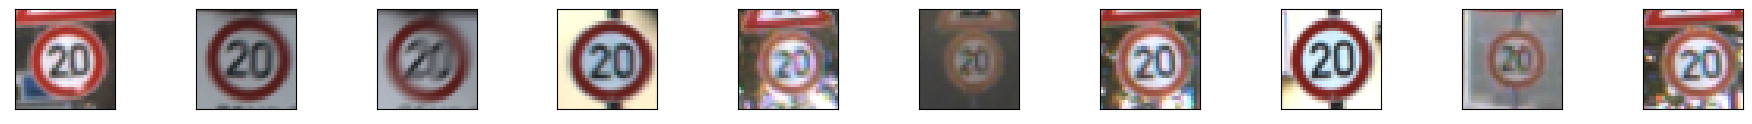

1 . Class :  Speed limit (30km/h)


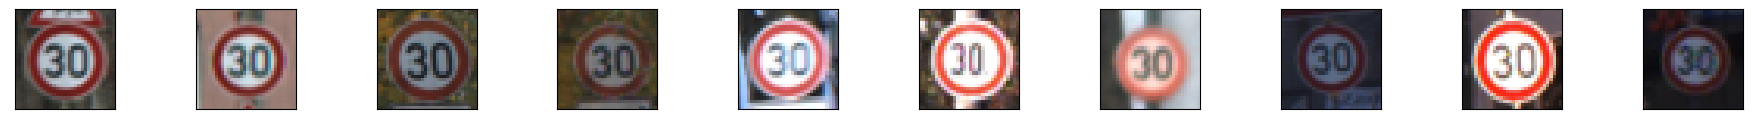

2 . Class :  Speed limit (50km/h)


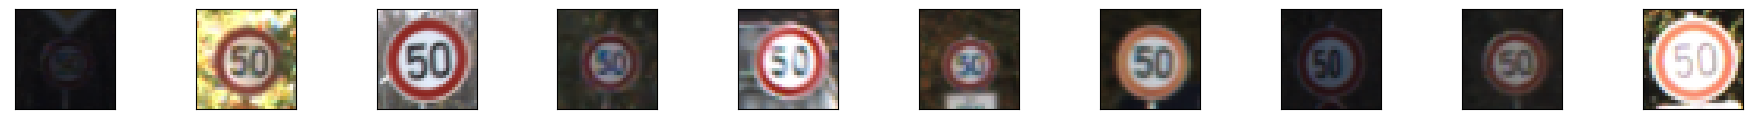

3 . Class :  Speed limit (60km/h)


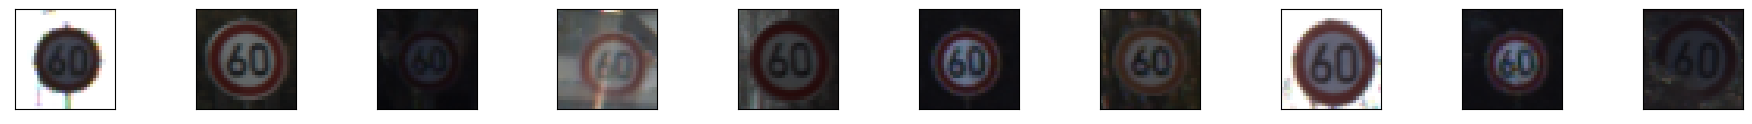

4 . Class :  Speed limit (70km/h)


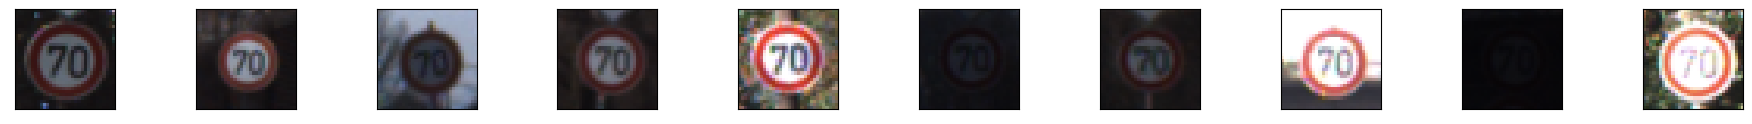

5 . Class :  Speed limit (80km/h)


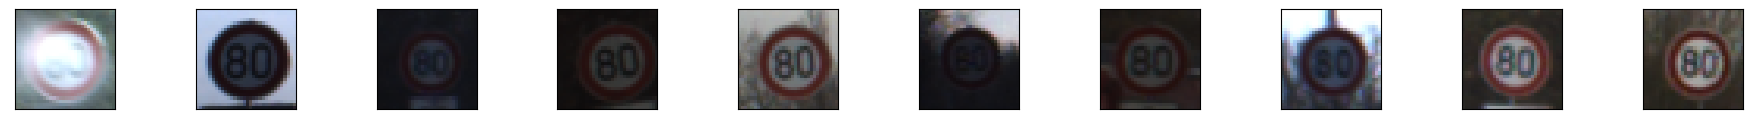

6 . Class :  End of speed limit (80km/h)


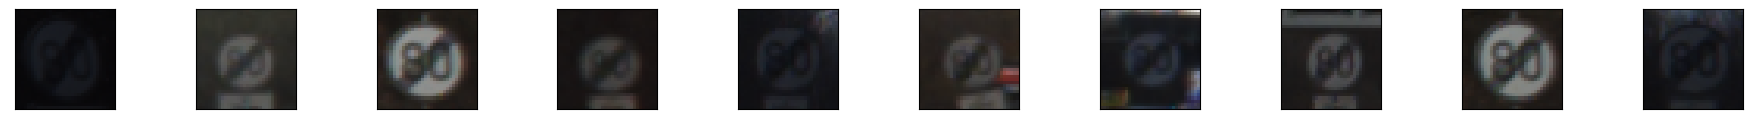

7 . Class :  Speed limit (100km/h)


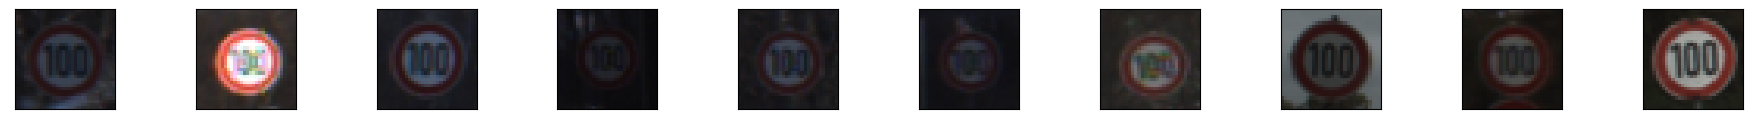

8 . Class :  Speed limit (120km/h)


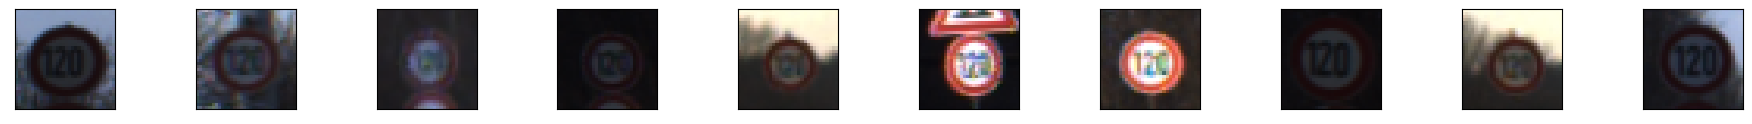

9 . Class :  No passing


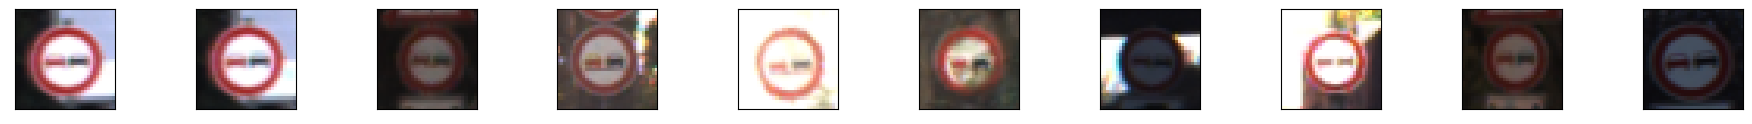

10 . Class :  No passing for vehicles over 3.5 metric tons


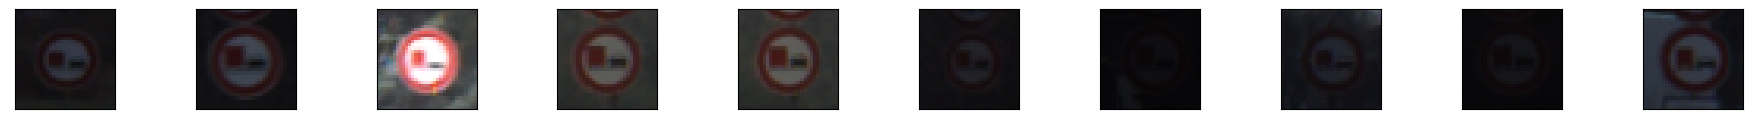

11 . Class :  Right-of-way at the next intersection


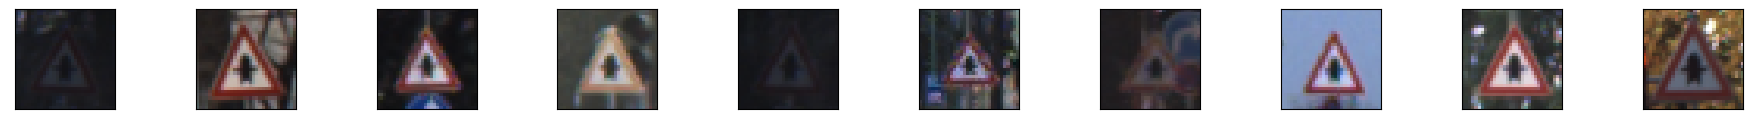

12 . Class :  Priority road


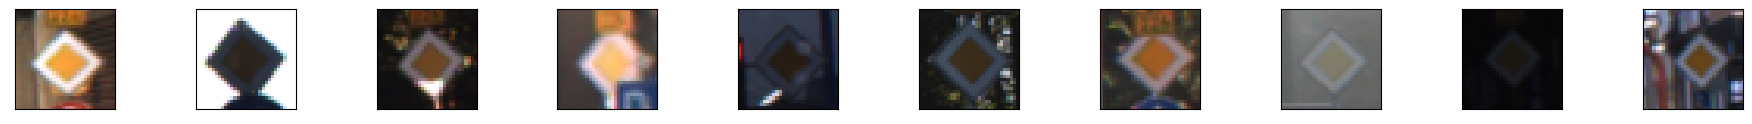

13 . Class :  Yield


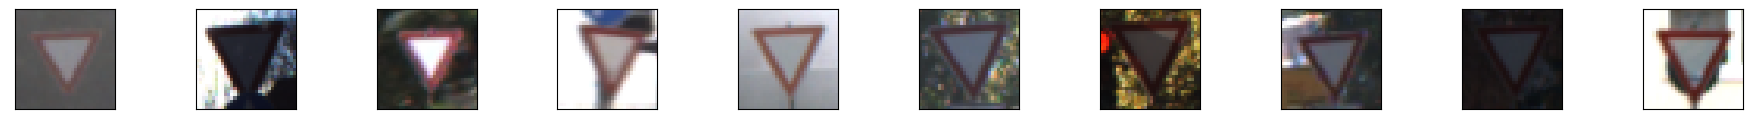

14 . Class :  Stop


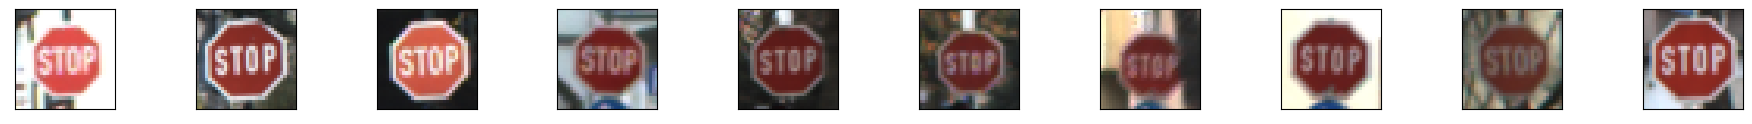

15 . Class :  No vehicles


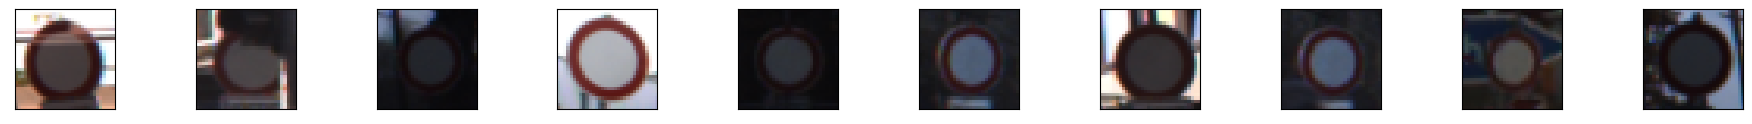

16 . Class :  Vehicles over 3.5 metric tons prohibited


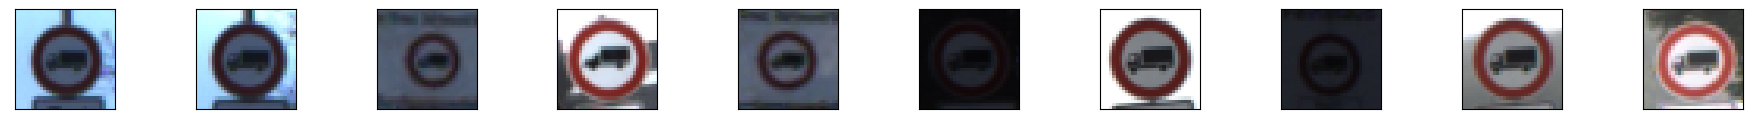

17 . Class :  No entry


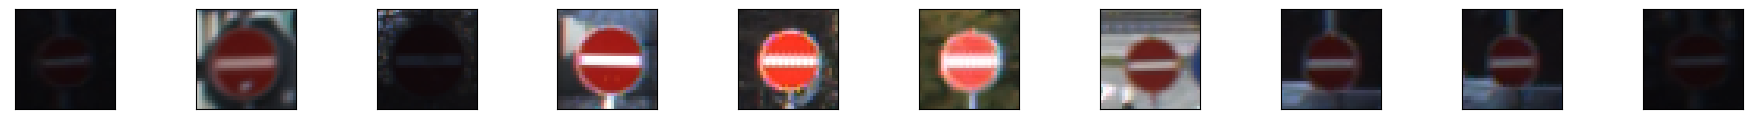

18 . Class :  General caution


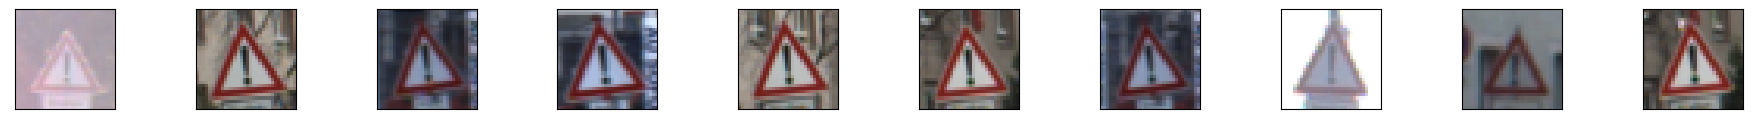

19 . Class :  Dangerous curve to the left


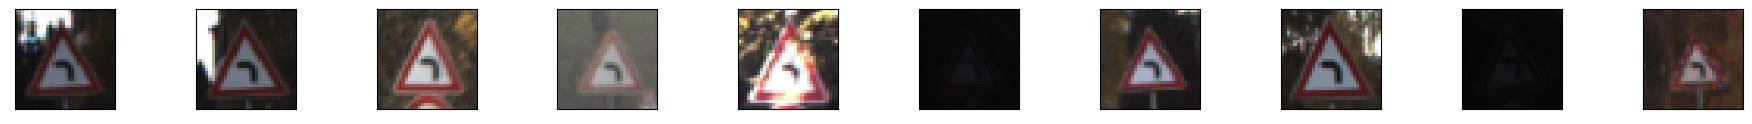

20 . Class :  Dangerous curve to the right


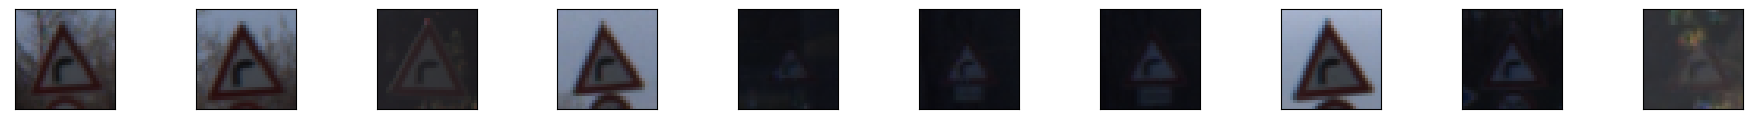

21 . Class :  Double curve


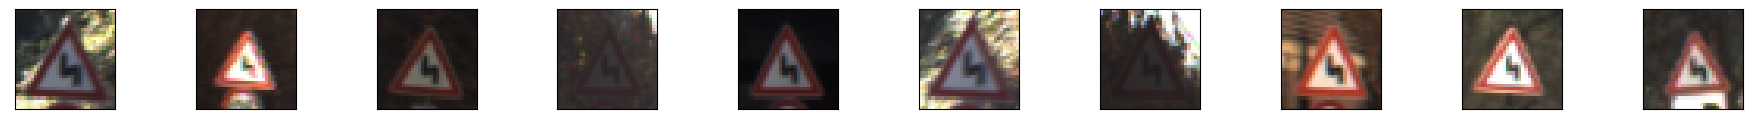

22 . Class :  Bumpy road


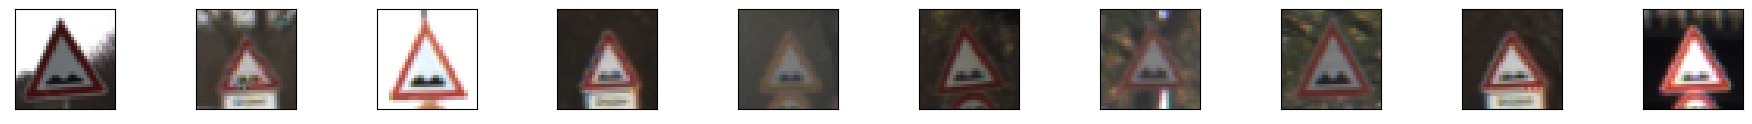

23 . Class :  Slippery road


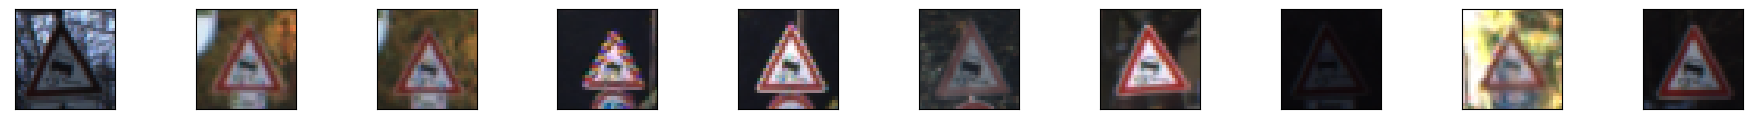

24 . Class :  Road narrows on the right


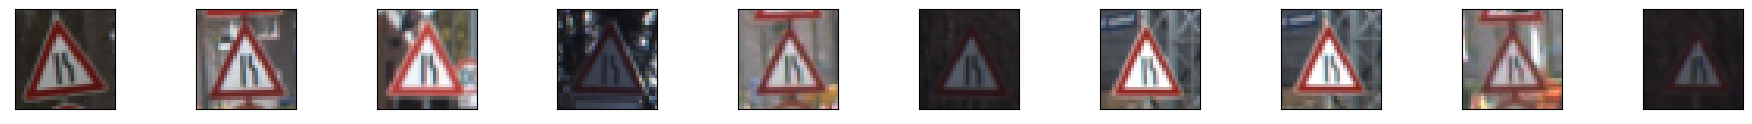

25 . Class :  Road work


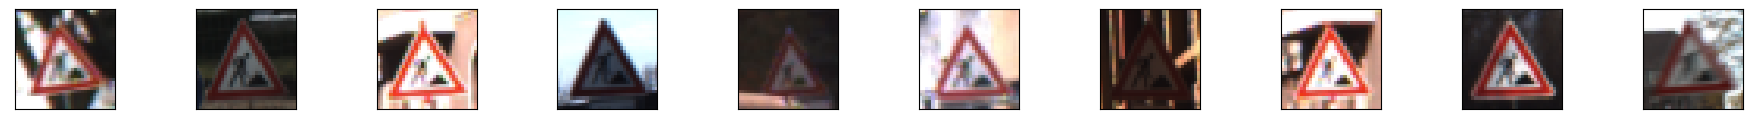

26 . Class :  Traffic signals


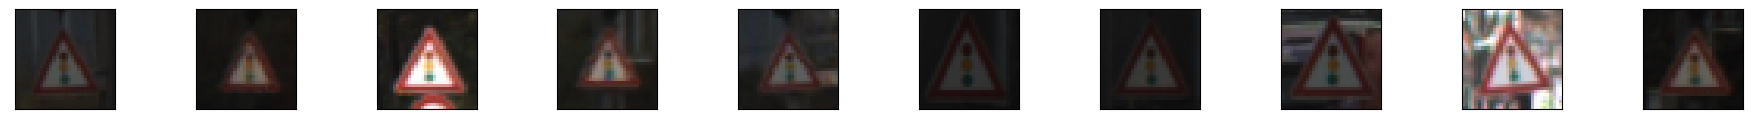

27 . Class :  Pedestrians


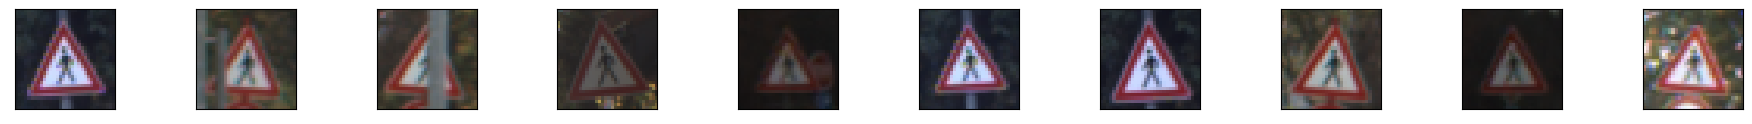

28 . Class :  Children crossing


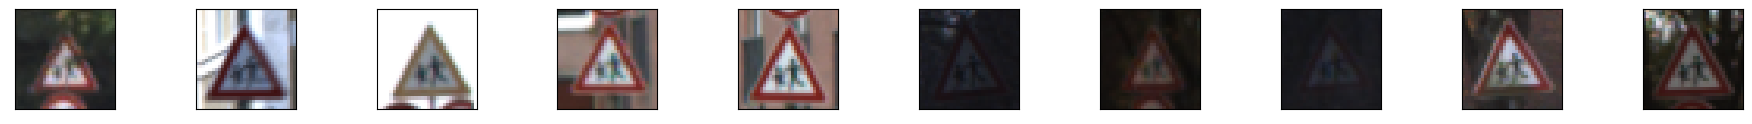

29 . Class :  Bicycles crossing


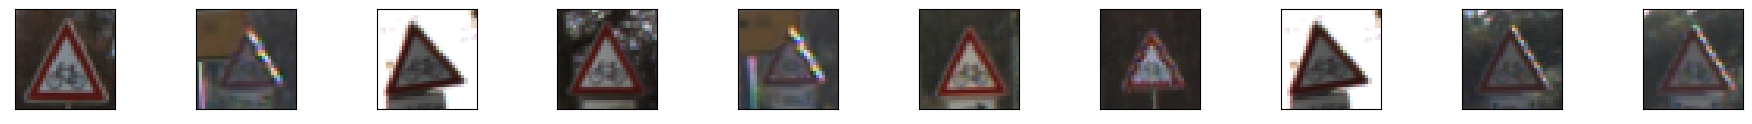

30 . Class :  Beware of ice/snow


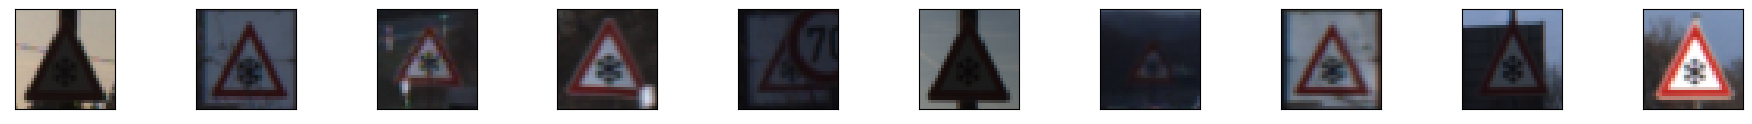

31 . Class :  Wild animals crossing


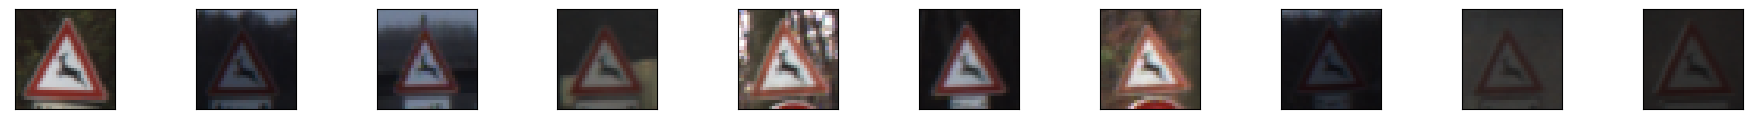

32 . Class :  End of all speed and passing limits


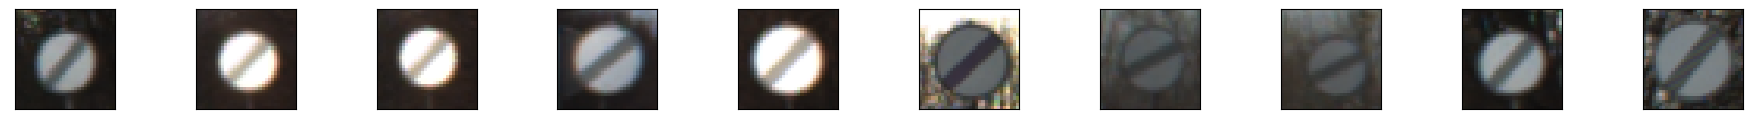

33 . Class :  Turn right ahead


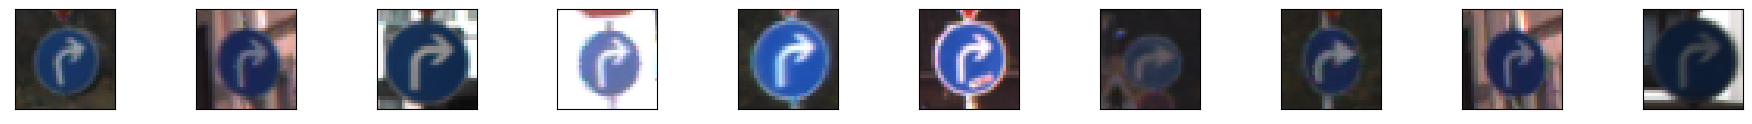

34 . Class :  Turn left ahead


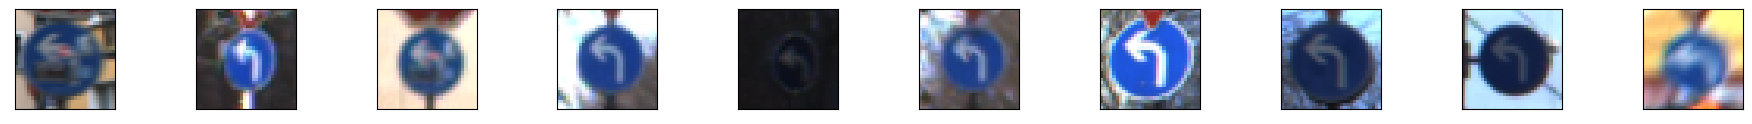

35 . Class :  Ahead only


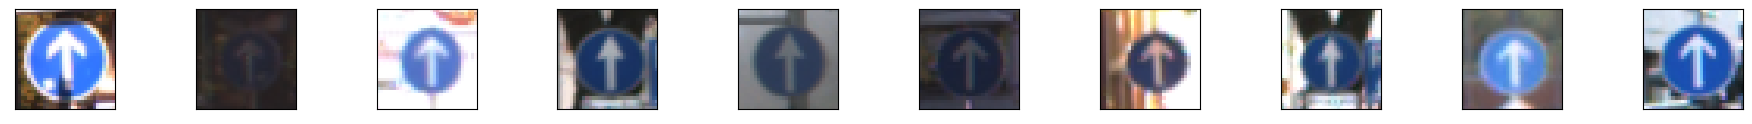

36 . Class :  Go straight or right


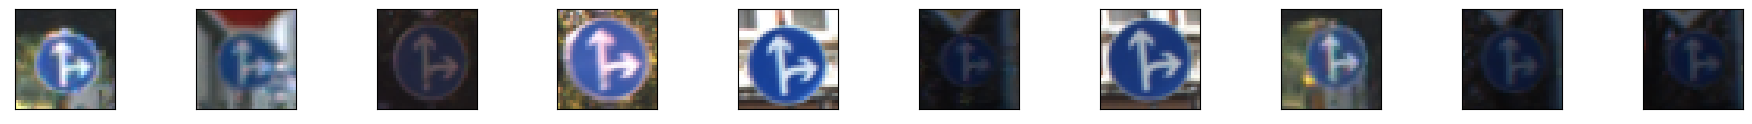

37 . Class :  Go straight or left


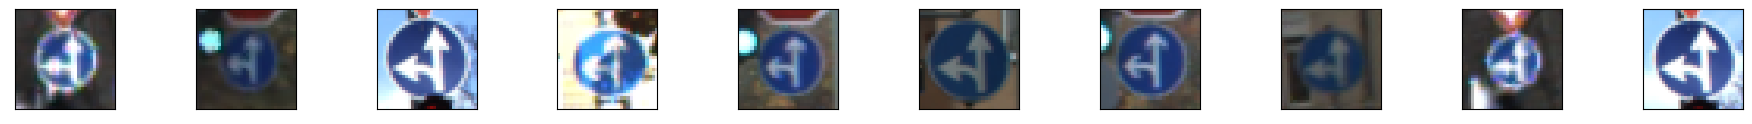

38 . Class :  Keep right


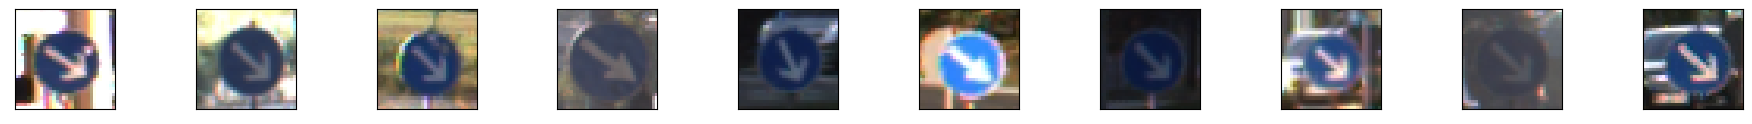

39 . Class :  Keep left


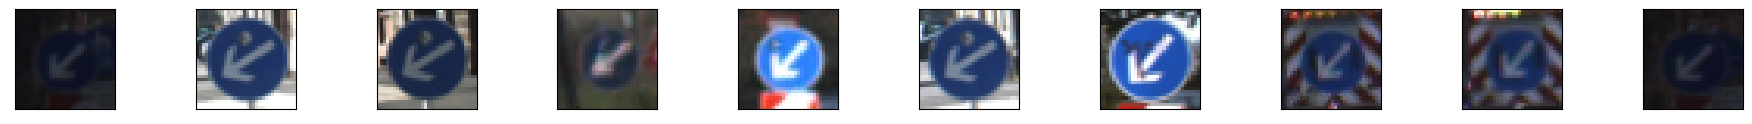

40 . Class :  Roundabout mandatory


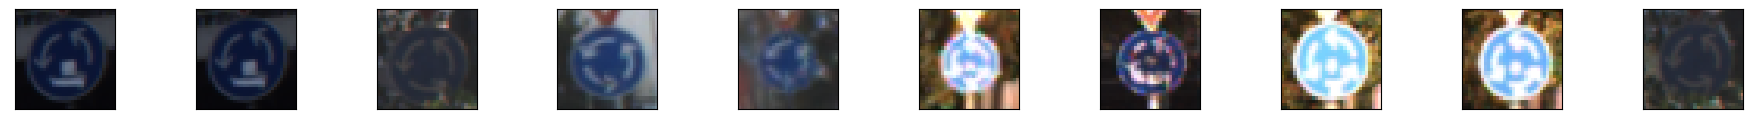

41 . Class :  End of no passing


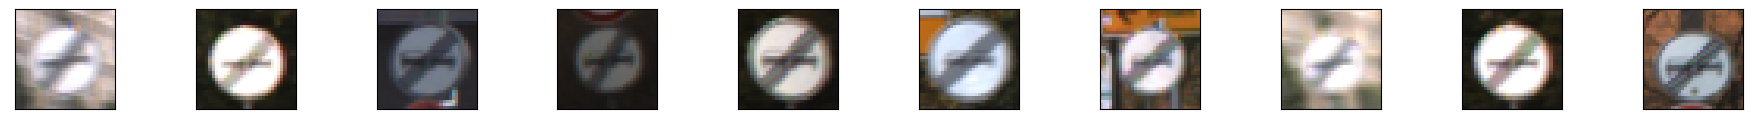

42 . Class :  End of no passing by vehicles over 3.5 metric tons


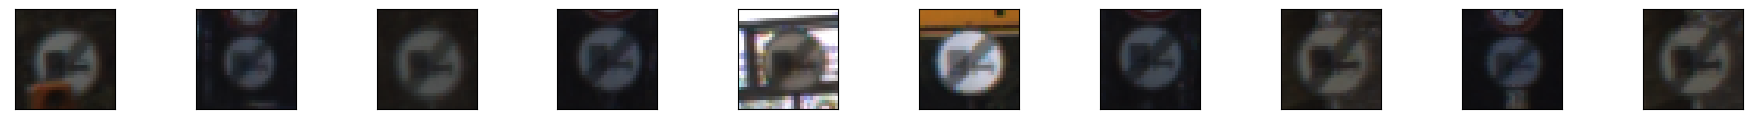

In [6]:
#Visualizations of image datasets for each class
for c, c_i, c_count in zip(classes, class_indices, class_counts):
    print(c, ". Class : ", sign_names[c] )
    fig = pyplot.figure(figsize = (18, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        random_indices = np.random.randint(c_i, c_i+c_count, 10)
        axis.imshow(X_train[random_indices[i],:,:,:])
        #axis.text(0, 0, '{}: {}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=8)

    pyplot.show()

###  Visual Overview of the Dataset

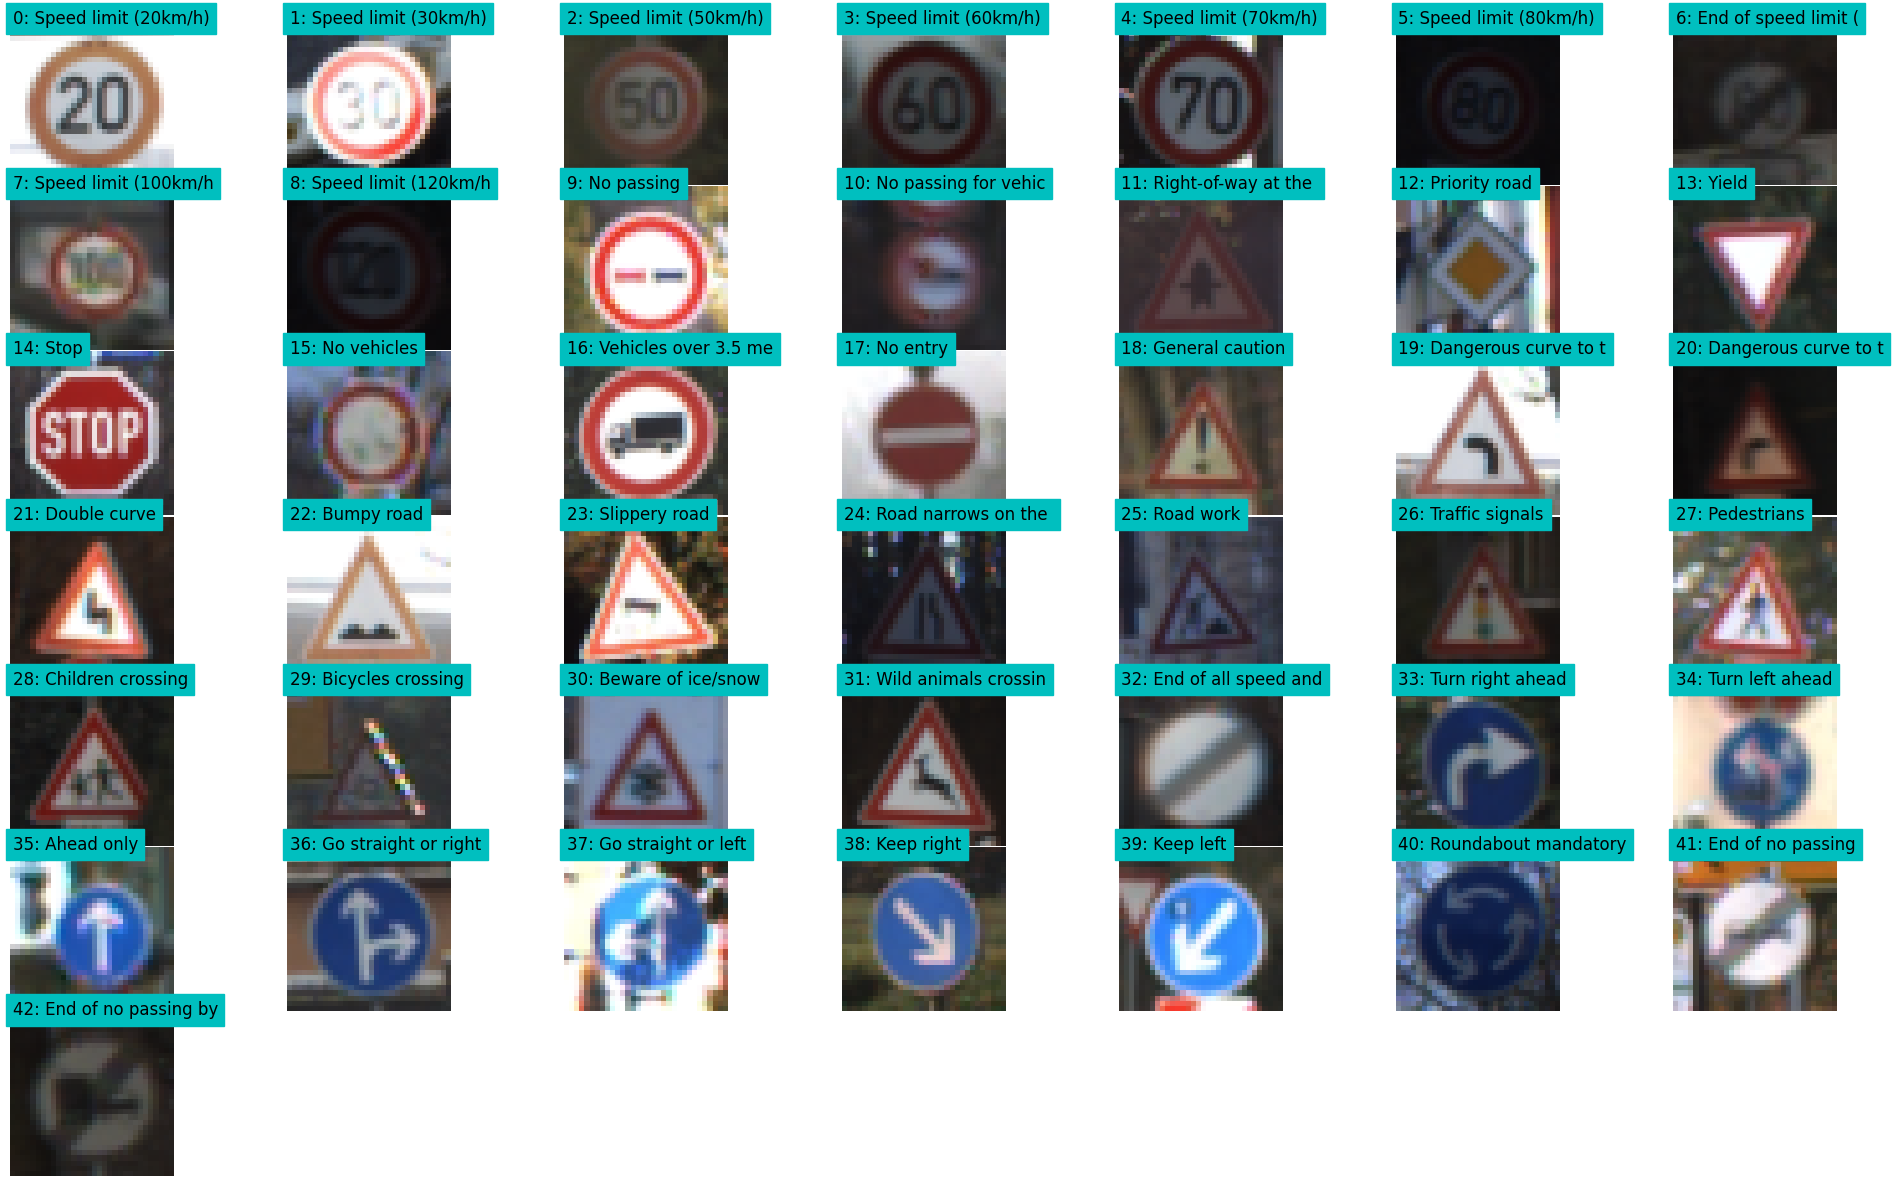

In [7]:
#Showing Random image datasets for each class
def plot_random_each_class(n_row,n_col,X,y):

    plt.figure(figsize = (25,15))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes.

    for c, c_i, c_count in zip(classes, class_indices, class_counts):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[c])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(c_i, c_i+c_count)
        plt.imshow(X[ind_plot])
        #plt.text(2,4,str(y[ind_plot]),color='k',backgroundcolor='c', fontsize=15)
        plt.text(0, 0, '{}: {:.20}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=12)

        plt.axis('off')
    plt.show()

plot_random_each_class(7,7,X_train,y_train)


## Data Augmentation

In [8]:
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import cv2

def rotate_image(image, max_angle =15):
    rotate_out = rotate(image, np.random.uniform(-max_angle, max_angle), mode='edge')
    return rotate_out

def translate_image(image, max_trans = 5, height=32, width=32):
    translate_x = max_trans*np.random.uniform() - max_trans/2
    translate_y = max_trans*np.random.uniform() - max_trans/2
    translation_mat = np.float32([[1,0,translate_x],[0,1,translate_y]])
    trans = cv2.warpAffine(image, translation_mat, (height,width))
    return trans

def projection_transform(image, max_warp=0.8, height=32, width=32):
    #Warp Location
    d = height * 0.3 * np.random.uniform(0,max_warp)

    #Warp co-ordinates
    tl_top = np.random.uniform(-d, d)     # Top left corner, top margin
    tl_left = np.random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-d, d)     # Top right corner, top margin
    tr_right = np.random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = np.random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-d, d)   # Bottom right corner, right margin

    ##Apply Projection
    transform = ProjectiveTransform()
    transform.estimate(np.array((
                (tl_left, tl_top),
                (bl_left, height - bl_bottom),
                (height - br_right, height - br_bottom),
                (height - tr_right, tr_top)
            )), np.array((
                (0, 0),
                (0, height),
                (height, height),
                (height, 0)
            )))
    output_image = warp(image, transform, output_shape=(height, width), order = 1, mode = 'edge')
    return output_image


def transform_image(image, max_angle=15, max_trans =5 ,max_warp=0.8):
    ## Simple pipline to take an input image and apply a serise of simple
    ## Distortions to augment the training data set
    ## (note: this function will rescale pixel values between 0-1)
    ##
    height, width, channels = image.shape
    #Rotate Image
    rotated_image = rotate_image(image, max_angle)
    #Translate Image
    translated_image = translate_image(rotated_image, max_trans, height, width)
    #Project Image
    output_image = projection_transform(translated_image, max_warp, height, width)
    return (output_image*255.0).astype(np.uint8)


def augment_and_balance_data(X_train, y_train, no_examples_per_class =5000):

    n_examples = no_examples_per_class
    #Get paramters of data
    classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
    height, width, channels = X_train[0].shape


    #Create new data and labels for the balanced augmented data
    X_balance = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    y_balance = np.empty([0], dtype = y_train.dtype)


    for c, count in zip(range(n_classes), class_counts):
        ##Copy over the current data for the given class
        X_orig = X_train[y_train == c]
        y_orig = y_train[y_train == c]
        ##Add original data to the new dataset
        X_balance = np.append(X_balance, X_orig, axis=0)
        print(c,count)
        temp_X = np.empty([n_examples-count, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
        for i in range(n_examples - count):
            temp_X[i,:,:,:] = transform_image(X_orig[i%count]).reshape((1, height, width, channels))


        X_balance = np.append(X_balance,temp_X, axis=0)
        n_added_ex = X_balance.shape[0] - y_balance.shape[0]
        y_balance = np.append(y_balance, np.full(n_added_ex, c, dtype =int))


    return X_balance.astype(np.uint8), y_balance



C:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### Data Augmentation by Rotation

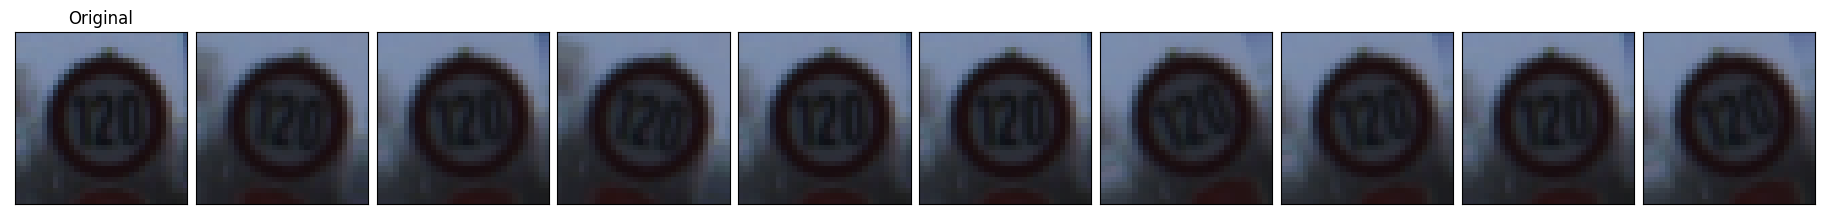

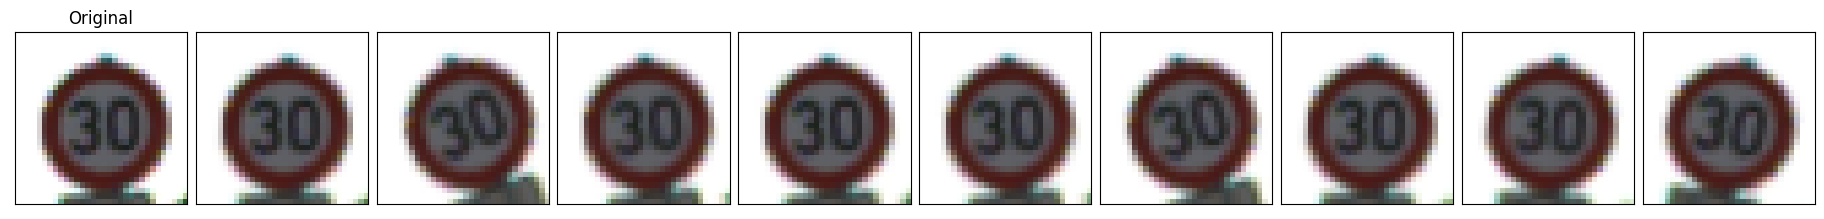

In [9]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(rotate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Data Augmentation by Translation

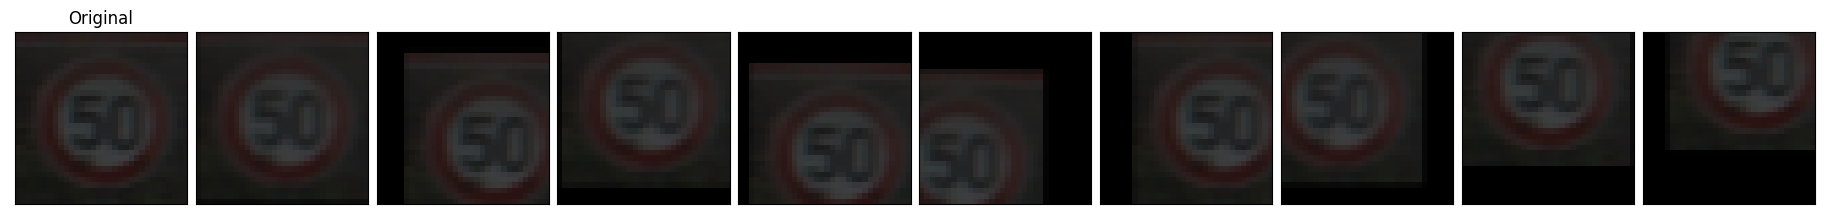

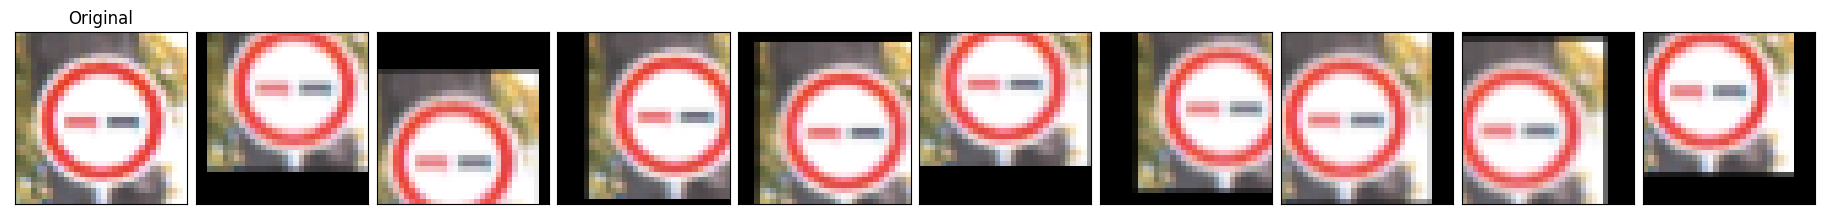

In [10]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(translate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

### Data Augmentation by Homography Projection

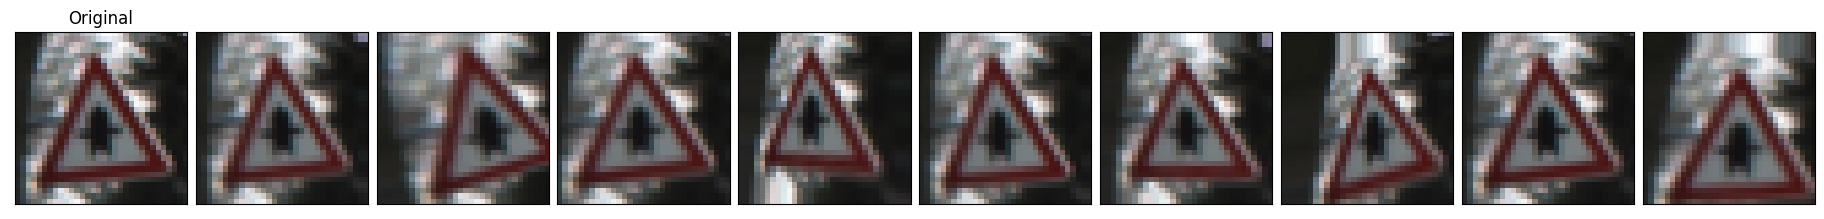

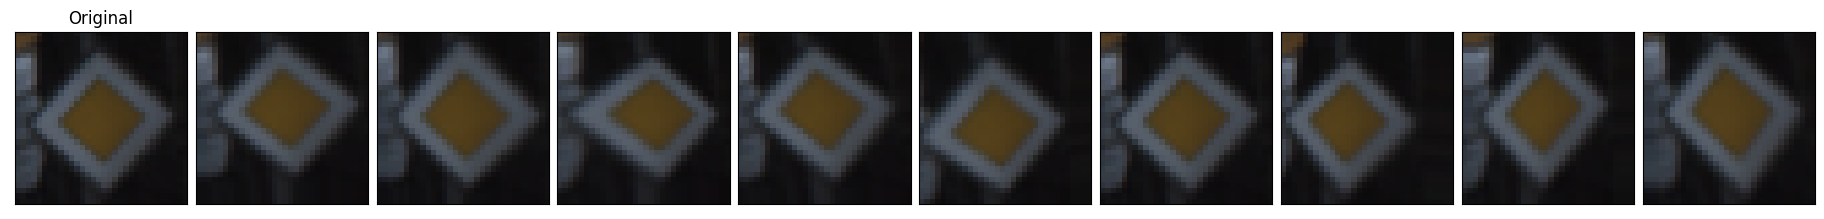

In [11]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(projection_transform(X_train[image[j],:,:,:]))
    pyplot.show()

### Pipeline for Data Augmentation

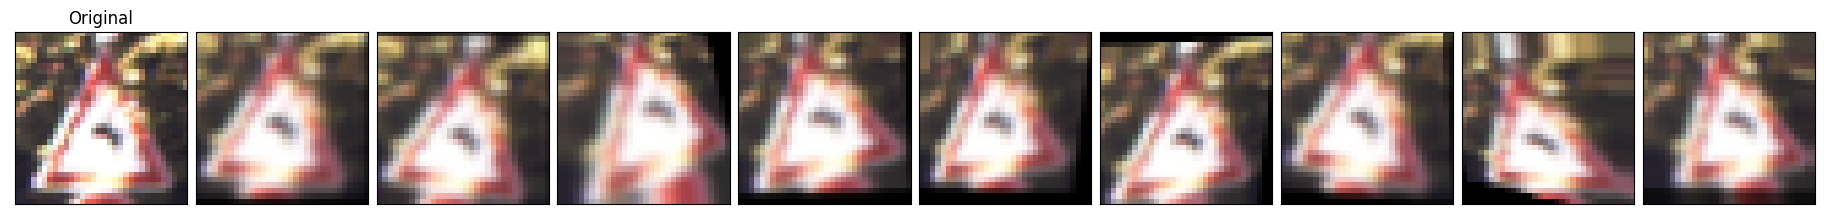

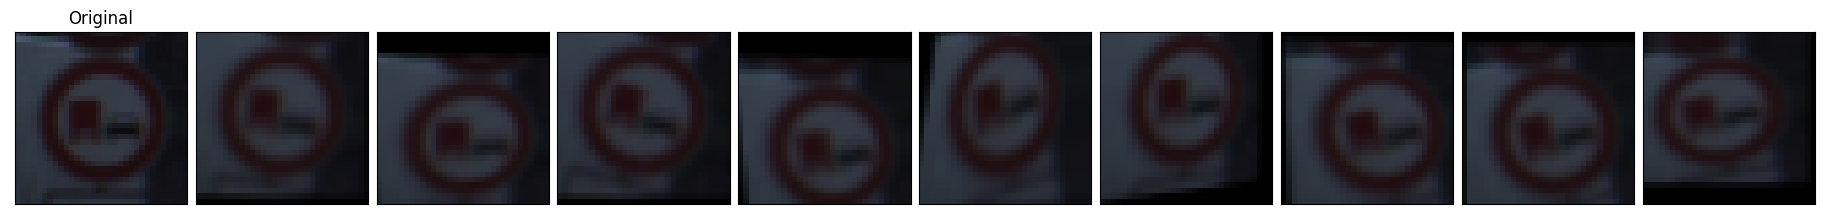

In [12]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(transform_image(X_train[image[j],:,:,:]))
    pyplot.show()

## Data Preprocessig

In [13]:
from sklearn.utils import shuffle

## Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)

In [14]:
# Convert RGB images to grayscale for the training set
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the testing set
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)

# Convert RGB images to grayscale for the validation set
X_validation_gray  = np.sum(X_valid/3, axis=3, keepdims=True)


In [15]:
# Normalize the training set of grayscale images
X_train_gray_norm = (X_train_gray - 32) / 32

# Normalize the test set of grayscale images
X_test_gray_norm = (X_test_gray - 32) / 32

# Normalize the validation set of grayscale images
X_validation_gray_norm = (X_validation_gray - 32) / 32


In [16]:
# Onehot Encoding the labels.
from tensorflow.keras.utils import to_categorical

# Store the original labels for future reference
y_train_unchanged = y_train
y_validation_unchanged = y_valid
y_test_unchanged = y_test

# Perform Onehot Encoding on the labels
# Convert the labels from integer representation to binary matrix representation
y_train = to_categorical(y_train)
y_validation = to_categorical(y_valid)
y_test = to_categorical(y_test)


In [17]:
# Shape of Train dataset
X_train.shape

(34799, 32, 32, 3)

In [18]:
# Shape of Test dataset
X_test.shape

(12630, 32, 32, 3)

In [19]:
# Shape of Validation dataset
X_valid.shape

(4410, 32, 32, 3)

## Model Architecture -1 : ALEXNET

In [20]:
# Define the architecture of AlexNet
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

# Create a Sequential model
AlexNet = Sequential()

# Add the 1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Flatten the input
AlexNet.add(Flatten())

# Add the 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the Output layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

# Print the model summary
AlexNet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          11712     
                                                                 
 batch_normalization (Batch  (None, 8, 8, 96)          384       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 96)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Bat  (None, 4, 4, 256)         1

In [21]:
# Compile the AlexNet model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
AlexNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the AlexNet model on the training data, for a total of 20 epochs, with validation data for monitoring performance
# X_train_gray_norm and y_train represent the preprocessed and normalized training data
# X_validation_gray_norm and y_validation represent the preprocessed and normalized validation data
history = AlexNet.fit(X_train_gray_norm, y_train, epochs=21, validation_data=(X_validation_gray_norm, y_validation))


Epoch 1/21
1088/1088 [==============================] - 293s 267ms/step - loss: 2.5298 - accuracy: 0.3643 - val_loss: 1.8748 - val_accuracy: 0.4971
Epoch 2/21
1088/1088 [==============================] - 306s 282ms/step - loss: 1.2075 - accuracy: 0.7076 - val_loss: 1.2524 - val_accuracy: 0.6717
Epoch 3/21
1088/1088 [==============================] - 5096s 5s/step - loss: 0.7975 - accuracy: 0.8132 - val_loss: 1.2198 - val_accuracy: 0.6846
Epoch 4/21
1088/1088 [==============================] - 293s 269ms/step - loss: 0.5880 - accuracy: 0.8647 - val_loss: 1.0014 - val_accuracy: 0.7308
Epoch 5/21
1088/1088 [==============================] - 284s 261ms/step - loss: 0.4563 - accuracy: 0.8981 - val_loss: 0.7503 - val_accuracy: 0.8050
Epoch 6/21
1088/1088 [==============================] - 289s 265ms/step - loss: 0.3676 - accuracy: 0.9208 - val_loss: 0.8363 - val_accuracy: 0.7866
Epoch 7/21
1088/1088 [==============================] - 291s 268ms/step - loss: 0.3099 - accuracy: 0.9337 - val_lo

In [22]:
import tensorflow as tf

# Save the model
AlexNet.save("Best_AlexNet.h5")

#Loading Saved model
New_model1 = tf.keras.models.load_model('Best_AlexNet.h5')

C:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


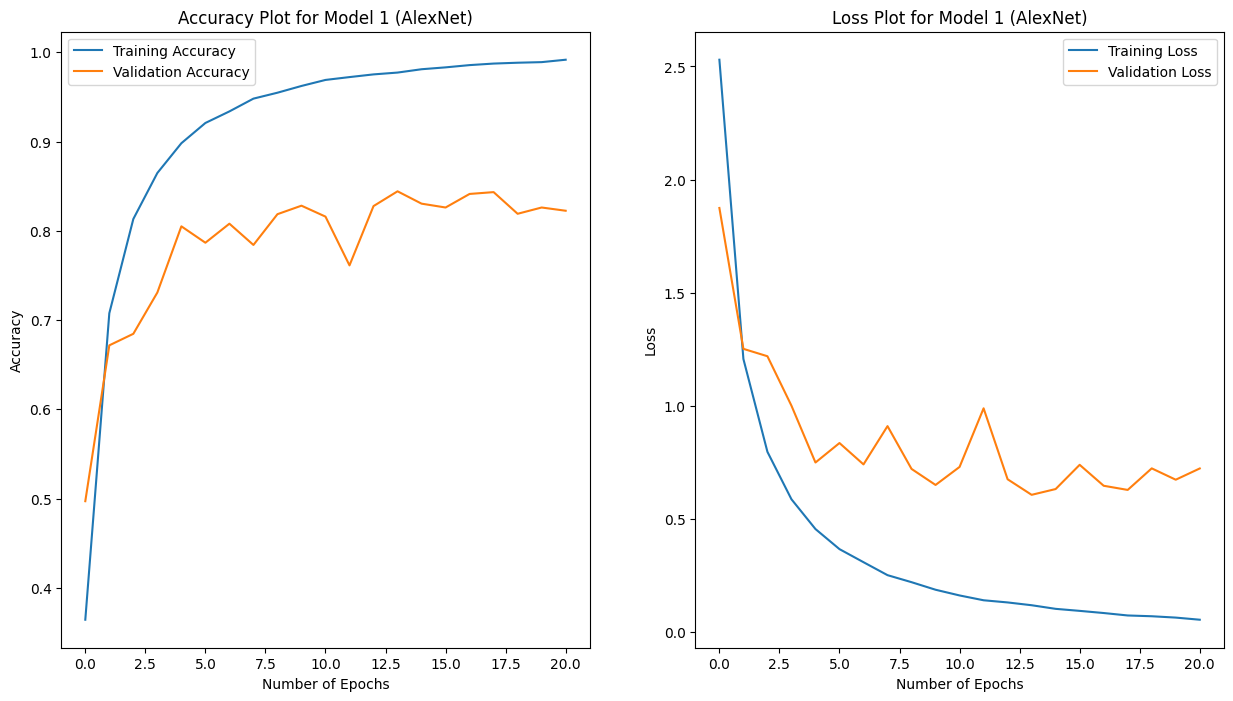

In [23]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 1 (AlexNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 1 (AlexNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 1 Evaluation & Report

In [24]:
New_model1.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 10s 24ms/step - loss: 0.6615 - accuracy: 0.8413


[0.6615225076675415, 0.841251015663147]

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = New_model1.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 1 (AlexNet):")
print(classification_rep)


395/395 [==============================] - 9s 21ms/step

Classification Report for Model 1 (AlexNet):
              precision    recall  f1-score   support

           0       0.57      0.38      0.46        60
           1       0.79      0.97      0.87       720
           2       0.85      0.90      0.87       750
           3       0.88      0.66      0.75       450
           4       0.63      0.89      0.74       660
           5       0.79      0.75      0.77       630
           6       0.99      0.83      0.90       150
           7       0.91      0.62      0.74       450
           8       0.73      0.86      0.79       450
           9       0.98      0.88      0.93       480
          10       0.96      0.97      0.97       660
          11       0.92      0.88      0.90       420
          12       0.91      0.91      0.91       690
          13       0.98      0.99      0.98       720
          14       0.97      0.85      0.91       270
          15       0.96      0.94

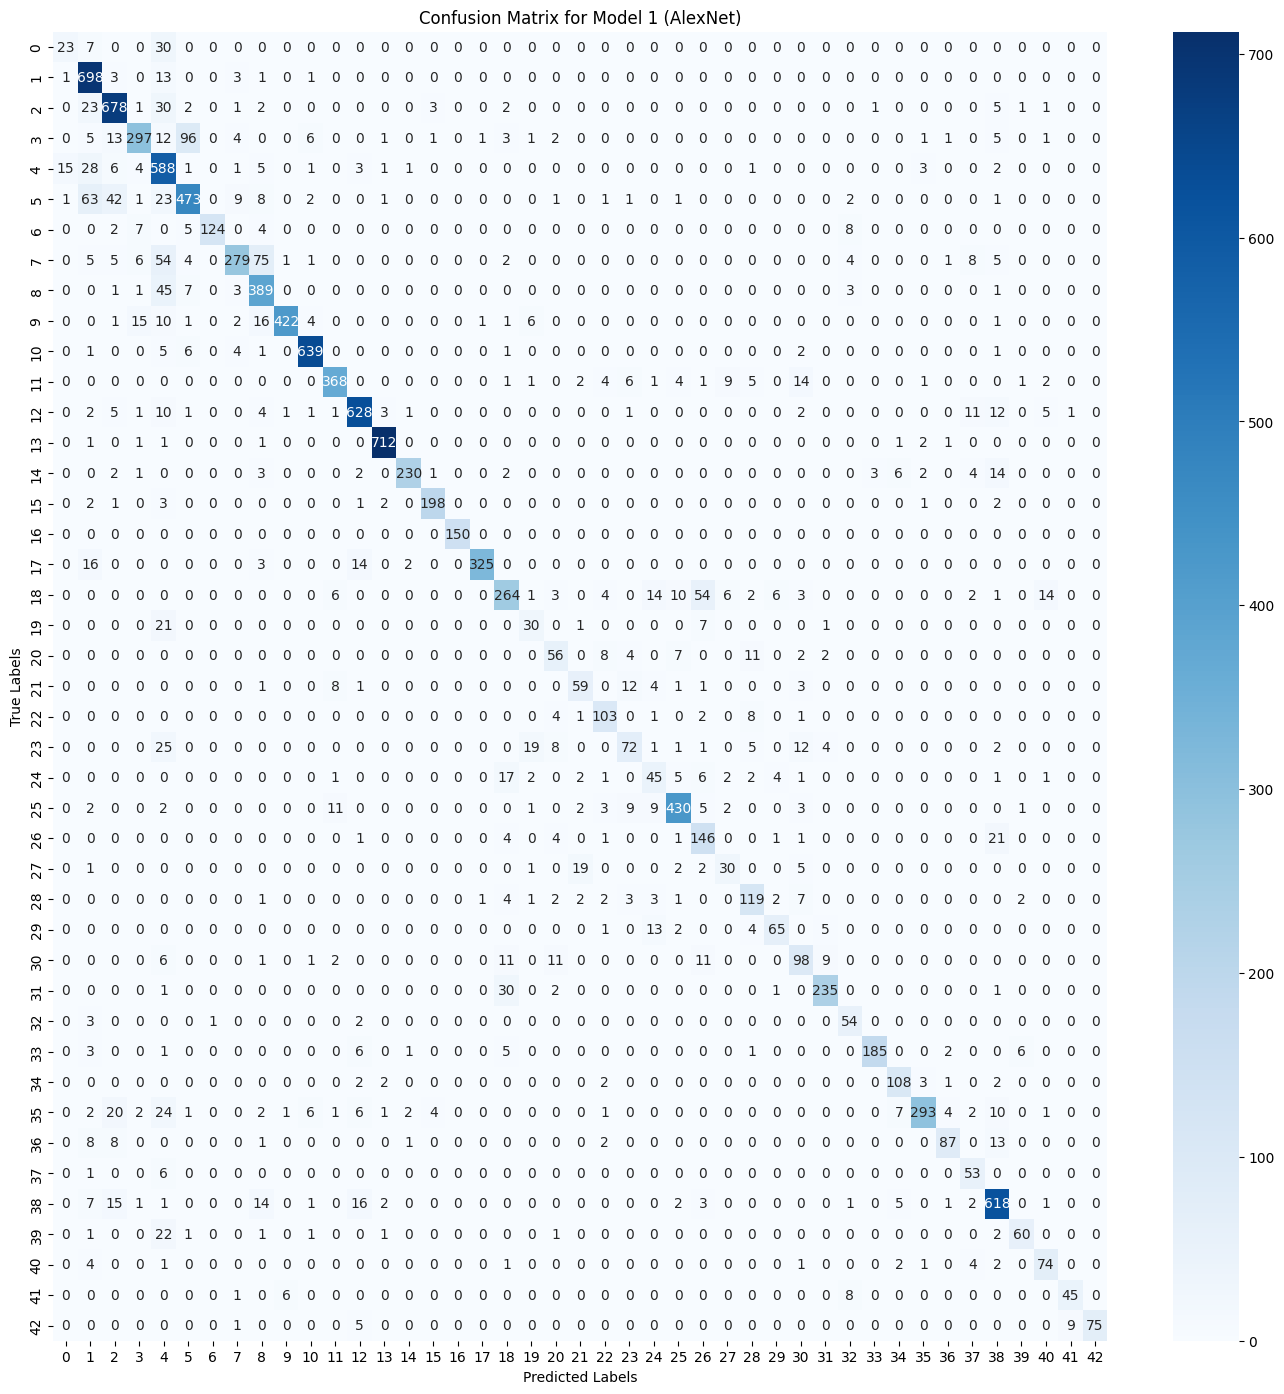

In [26]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 1 (AlexNet)')
plt.show()


## Model Architecture -2 : DenseNET

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.densenet import DenseNet121
from keras.layers import Convolution2D
# from keras.layers.convolutional import Conv2D

import numpy as np

np.random.seed(1000)

# Create a Sequential model
model = Sequential()

# Add the 1st Convolutional Layer to expand single-channel input to three channels
model.add(Conv2D(filters=3, kernel_size=(1, 1), input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Add the DenseNet121 base model
base_model = DenseNet121(include_top=False, input_shape=(32, 32, 3))
model.add(base_model)

# Flatten the input
model.add(Flatten())

# Add the 1st Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the Output layer
model.add(Dense(43))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Print the model summary
model.summary()


29084464/29084464 [==============================] - 27s 1us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 3)         6         
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 3)         12        
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 32, 32, 3)         0         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 4096)             

In [29]:
from tensorflow.keras.optimizers import Adam

# Compile the AlexNet model with specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with the specified training data, validation data, callbacks, and batch size
history = model.fit(X_train_gray_norm, y_train, epochs=15, validation_data=(X_validation_gray_norm, y_validation))


Epoch 1/15
1088/1088 [==============================] - 712s 617ms/step - loss: 1.1615 - accuracy: 0.7309 - val_loss: 0.5903 - val_accuracy: 0.8737
Epoch 2/15
1088/1088 [==============================] - 739s 679ms/step - loss: 0.4013 - accuracy: 0.9272 - val_loss: 0.5498 - val_accuracy: 0.8905
Epoch 3/15
1088/1088 [==============================] - 843s 775ms/step - loss: 0.2561 - accuracy: 0.9555 - val_loss: 0.3272 - val_accuracy: 0.9385
Epoch 4/15
1088/1088 [==============================] - 843s 775ms/step - loss: 0.1719 - accuracy: 0.9687 - val_loss: 0.3874 - val_accuracy: 0.9268
Epoch 5/15
1088/1088 [==============================] - 1293s 1s/step - loss: 0.1305 - accuracy: 0.9755 - val_loss: 0.4116 - val_accuracy: 0.9113
Epoch 6/15
1088/1088 [==============================] - 1263s 1s/step - loss: 0.1182 - accuracy: 0.9769 - val_loss: 0.2544 - val_accuracy: 0.9420
Epoch 7/15
1088/1088 [==============================] - 690s 635ms/step - loss: 0.0792 - accuracy: 0.9852 - val_loss

In [30]:
# Save the model
model.save("Best_DenseNet.h5")
 
#Loading Saved model
Best_DenseNet = tf.keras.models.load_model('Best_DenseNet.h5')

C:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


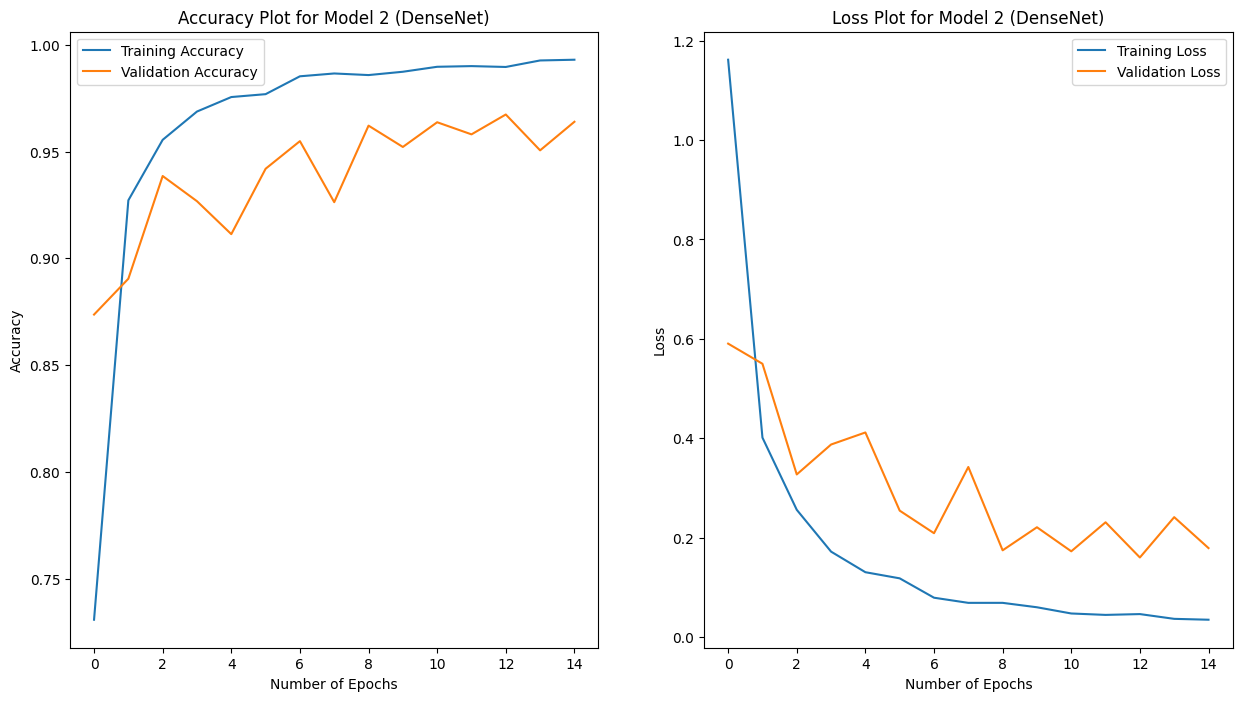

In [31]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 2 (DenseNet)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 2 (DenseNet)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 2 Evaluation & Report

In [32]:
Best_DenseNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 51s 117ms/step - loss: 0.2480 - accuracy: 0.9485


[0.24804115295410156, 0.9484560489654541]

In [33]:
# Assuming you have predictions for X_test_gray_norm
y_pred = Best_DenseNet.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 2:")
print(classification_rep)


395/395 [==============================] - 48s 117ms/step

Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        60
           1       0.91      0.96      0.93       720
           2       0.95      0.96      0.96       750
           3       0.96      0.92      0.94       450
           4       0.93      0.97      0.95       660
           5       0.91      0.92      0.92       630
           6       0.99      0.88      0.93       150
           7       0.98      0.96      0.97       450
           8       0.93      0.95      0.94       450
           9       0.97      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.83      1.00      0.91       420
          12       0.97      0.99      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      0.93      0.96       270
          15       1.00      0.94      0.

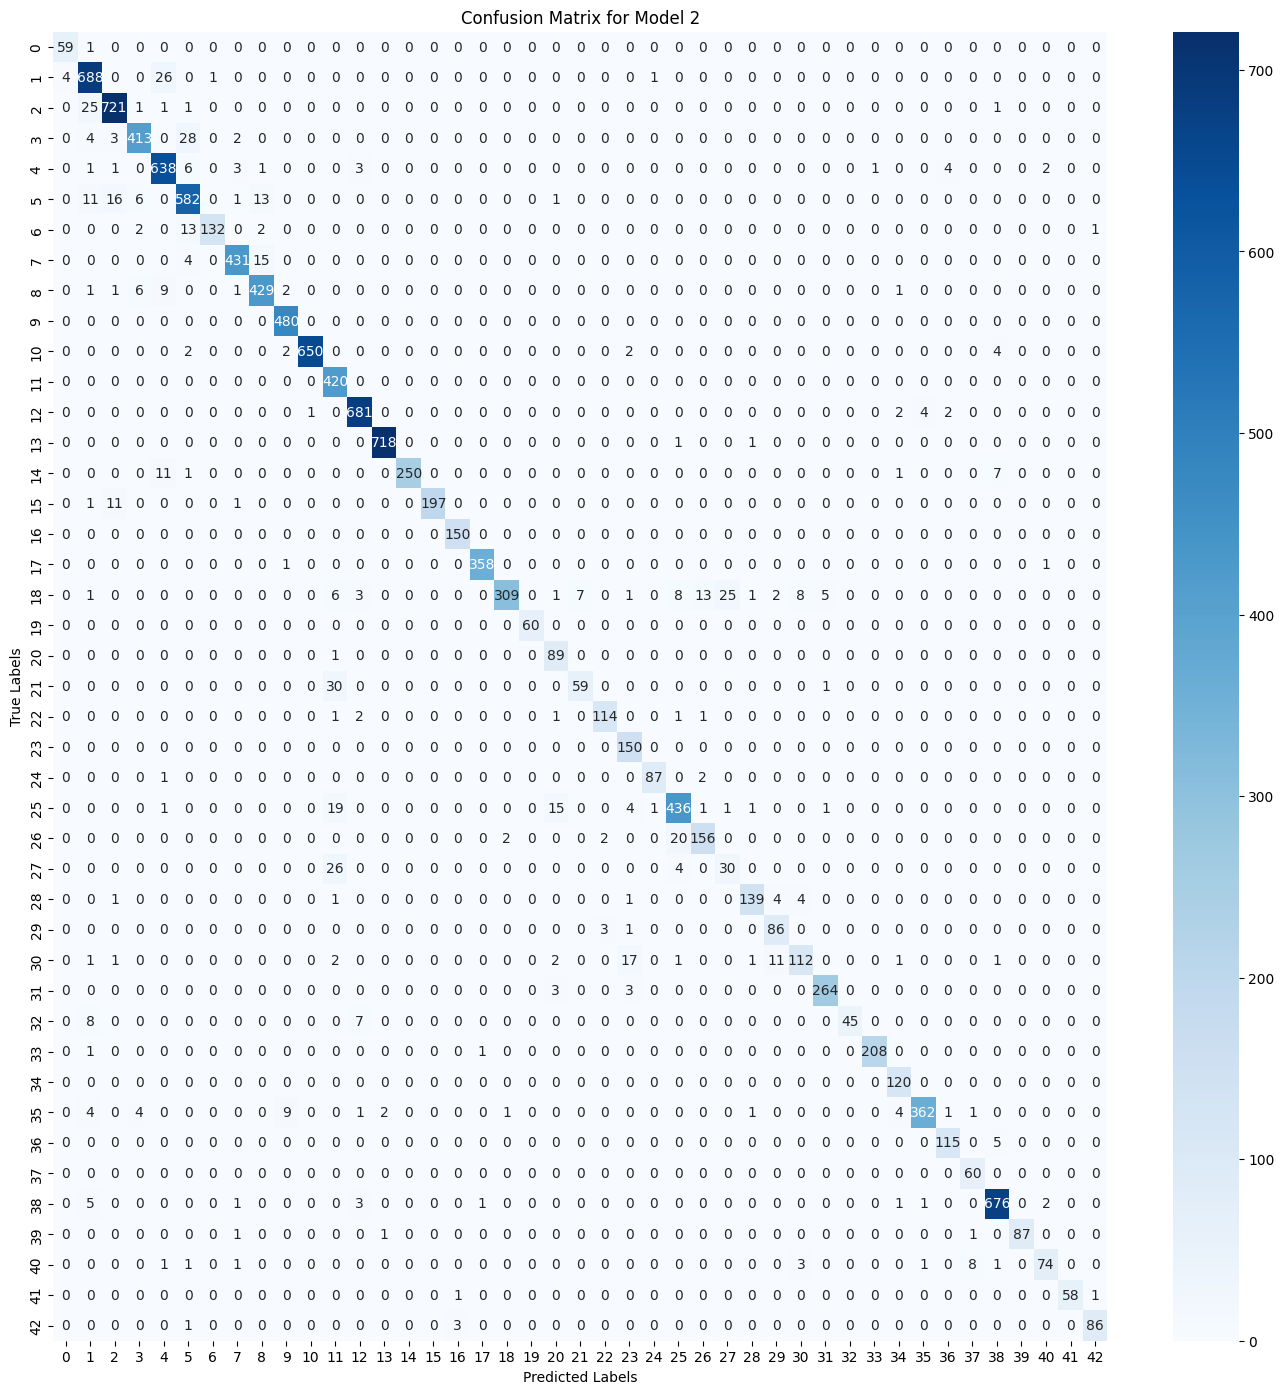

In [34]:
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 2')
plt.show()


## Model Architecture - 3: CNN

In [37]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, MaxPooling2D, Dropout

# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, 'same' padding, and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)))

# Add another convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))

# Add more convolutional and pooling layers, followed by dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 43 units (corresponding to the number of classes) and softmax activation
model.add(Dense(43, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [38]:
# Define early stopping callback to monitor validation loss and stop training if it doesn't improve for 30 epochs
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Define model checkpoint callback to save the best model based on validation loss
mc = ModelCheckpoint('best_CNN_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Compile the model with the specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_gray_norm, y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_gray_norm, y_validation),
                    shuffle=True,
                    callbacks=[stop, mc])


Epoch 1/50
70/70 [==============================] - ETA: 0s - loss: 3.2940 - accuracy: 0.1173
Epoch 1: val_loss improved from inf to 2.36675, saving model to best_CNN_model.h5
70/70 [==============================] - 66s 889ms/step - loss: 3.2940 - accuracy: 0.1173 - val_loss: 2.3667 - val_accuracy: 0.3655


C:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
70/70 [==============================] - ETA: 0s - loss: 1.3576 - accuracy: 0.5990
Epoch 2: val_loss improved from 2.36675 to 0.50204, saving model to best_CNN_model.h5
70/70 [==============================] - 59s 845ms/step - loss: 1.3576 - accuracy: 0.5990 - val_loss: 0.5020 - val_accuracy: 0.8549
Epoch 3/50
70/70 [==============================] - ETA: 0s - loss: 0.4516 - accuracy: 0.8604
Epoch 3: val_loss improved from 0.50204 to 0.23521, saving model to best_CNN_model.h5
70/70 [==============================] - 59s 843ms/step - loss: 0.4516 - accuracy: 0.8604 - val_loss: 0.2352 - val_accuracy: 0.9238
Epoch 4/50
70/70 [==============================] - ETA: 0s - loss: 0.2398 - accuracy: 0.9254
Epoch 4: val_loss improved from 0.23521 to 0.15750, saving model to best_CNN_model.h5
70/70 [==============================] - 60s 852ms/step - loss: 0.2398 - accuracy: 0.9254 - val_loss: 0.1575 - val_accuracy: 0.9519
Epoch 5/50
70/70 [==============================] - ETA: 0s - lo

70/70 [==============================] - 61s 870ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.0891 - val_accuracy: 0.9796
Epoch 31/50
70/70 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9945
Epoch 31: val_loss improved from 0.05026 to 0.04300, saving model to best_CNN_model.h5
70/70 [==============================] - 61s 871ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0430 - val_accuracy: 0.9882
Epoch 32/50
70/70 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9952
Epoch 32: val_loss did not improve from 0.04300
70/70 [==============================] - 61s 874ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0480 - val_accuracy: 0.9884
Epoch 33/50
70/70 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9955
Epoch 33: val_loss did not improve from 0.04300
70/70 [==============================] - 62s 882ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0785 - val_accuracy: 0.9846
Epoc

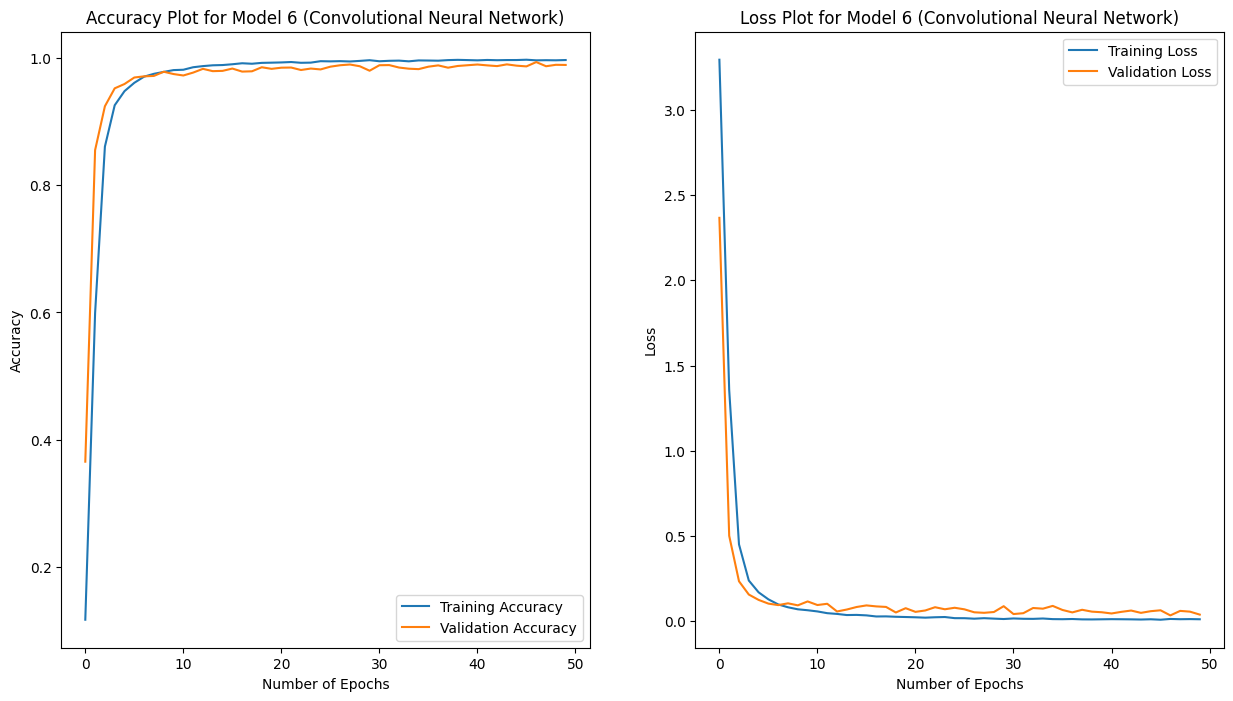

In [39]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plotting accuracy for model 1 on the left subplot
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Plot for Model 6 (Convolutional Neural Network)')
axes[0].set_xlabel('Number of Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting loss for model 1 on the right subplot
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Plot for Model 6 (Convolutional Neural Network)')
axes[1].set_xlabel('Number of Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.show()


### Model 4 Evaluation & Report

In [40]:
from keras.models import Sequential, load_model

# Load the best trained model from the saved file
best_CNN_model = load_model('best_CNN_model.h5')

# Evaluate the model performance on the test data
evaluation_results = best_CNN_model.evaluate(X_test_gray_norm, y_test)


395/395 [==============================] - 9s 20ms/step - loss: 0.0993 - accuracy: 0.9754


In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = best_CNN_model.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 6 (CNN):")
print(classification_rep)


395/395 [==============================] - 8s 20ms/step

Classification Report for Model 6 (CNN):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.98      1.00      0.99       720
           2       0.99      1.00      0.99       750
           3       1.00      0.94      0.97       450
           4       0.99      0.99      0.99       660
           5       0.96      0.99      0.97       630
           6       1.00      0.88      0.94       150
           7       1.00      0.98      0.99       450
           8       0.97      0.99      0.98       450
           9       0.97      0.99      0.98       480
          10       0.99      1.00      0.99       660
          11       0.93      0.96      0.95       420
          12       1.00      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       0.92      0.99      0.96       270
          15       1.00      1.00    

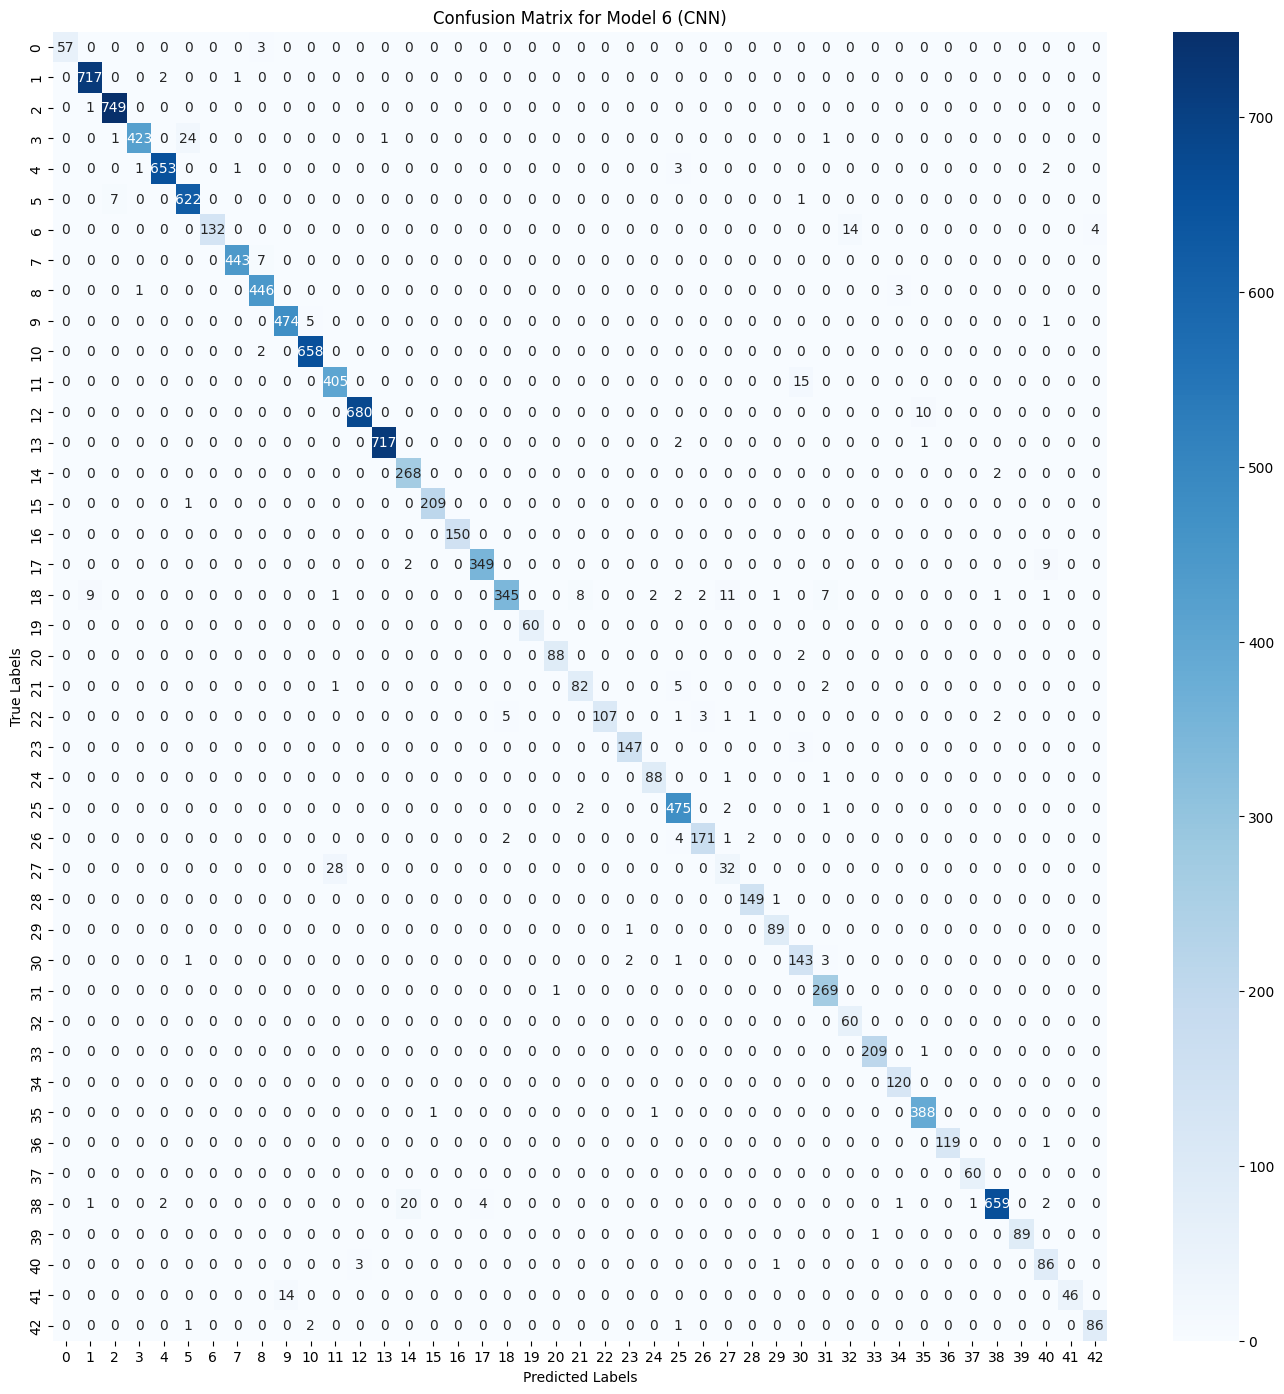

In [42]:
# Plot the confusion matrix
plt.figure(figsize=(17, 17))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 6 (CNN)')
plt.show()


### Prediction on Test Data with Convolutional Neural Network model

395/395 [==============================] - 8s 20ms/step
Accuracy on real test data: 97.54%
Real Label: 16, Predicted Label: 16


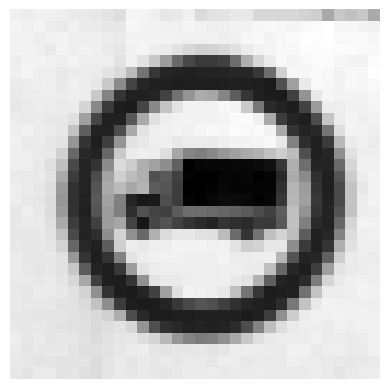

Real Label: 1, Predicted Label: 1


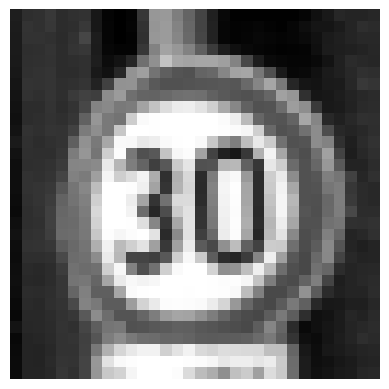

Real Label: 38, Predicted Label: 38


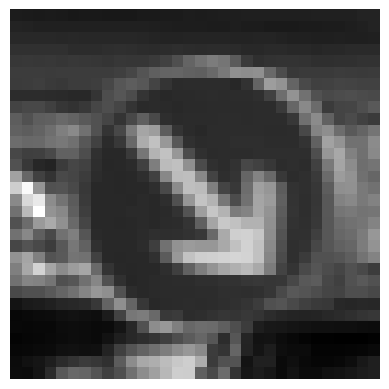

Real Label: 33, Predicted Label: 33


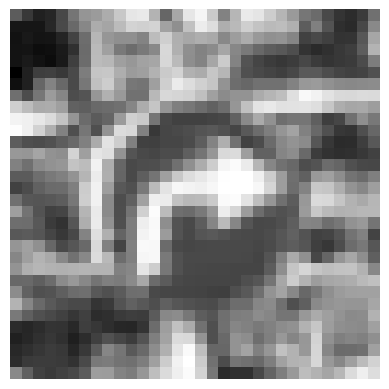

Real Label: 11, Predicted Label: 11


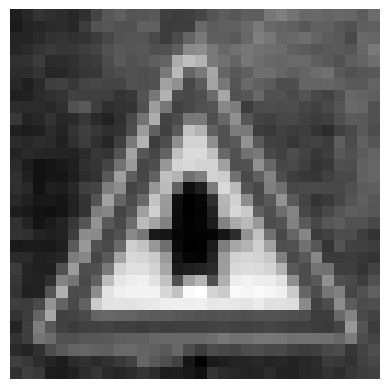

Real Label: 38, Predicted Label: 38


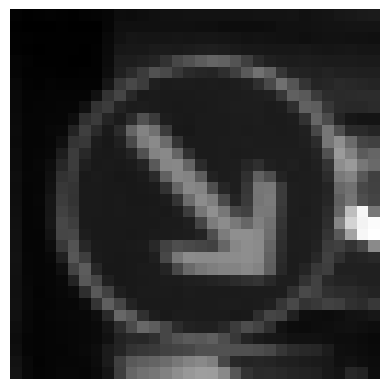

Real Label: 18, Predicted Label: 18


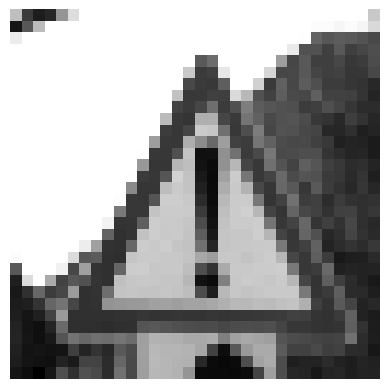

Real Label: 12, Predicted Label: 12


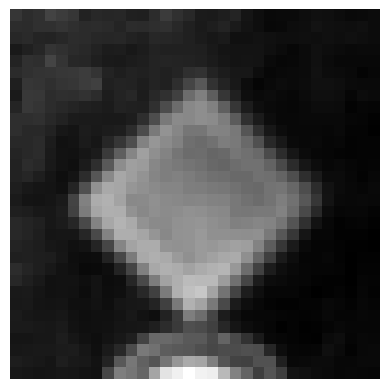

Real Label: 25, Predicted Label: 25


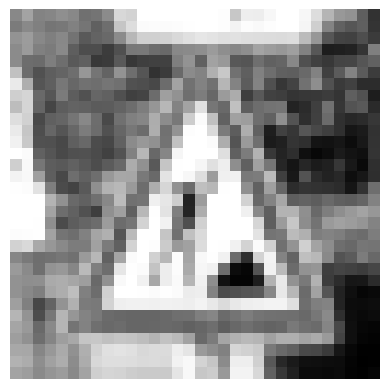

Real Label: 35, Predicted Label: 35


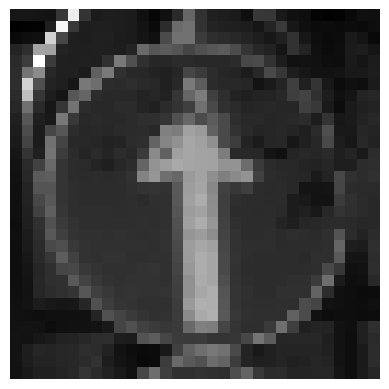

In [43]:
import numpy as np

# Predict on real test data
predictions = best_CNN_model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on real test data: {:.2%}".format(accuracy))

# Print test images with real and predicted labels
for i in range(10):
    # Display the test image
    plt.imshow(X_test_gray_norm[i], cmap='gray')
    plt.axis('off')

    # Get the real and predicted labels
    real_label = np.argmax(y_test[i])
    predicted_label = predicted_labels[i]

    # Print the labels
    print("Real Label: {}, Predicted Label: {}".format(real_label, predicted_label))

    # Show the plot
    plt.show()


In [44]:
print(sign_names)

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


395/395 [==============================] - 8s 20ms/step
Accuracy on test dataset: 97.54%


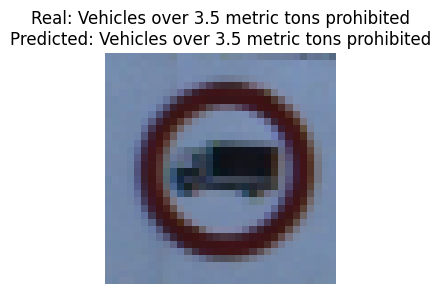

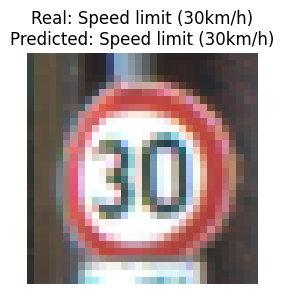

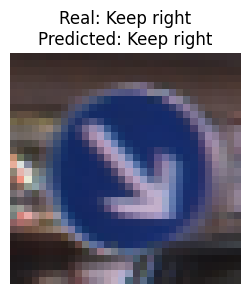

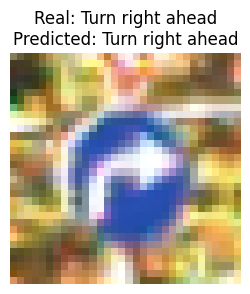

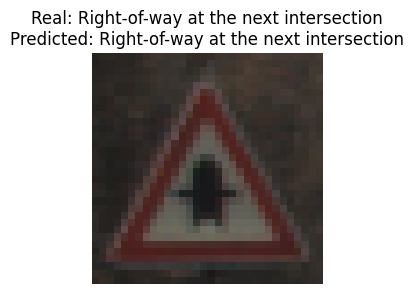

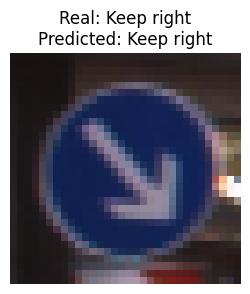

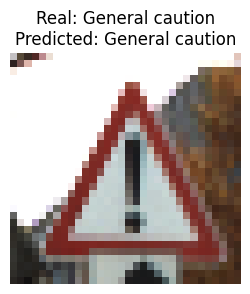

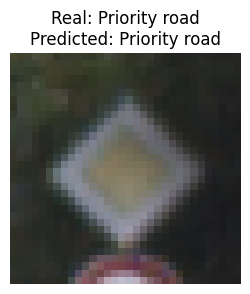

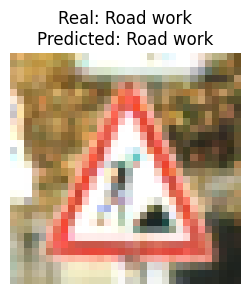

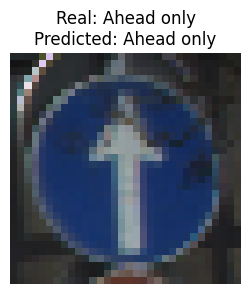

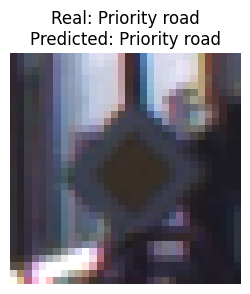

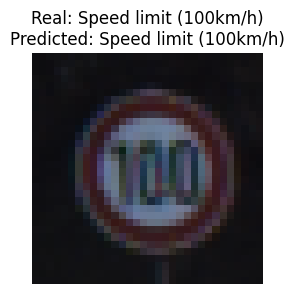

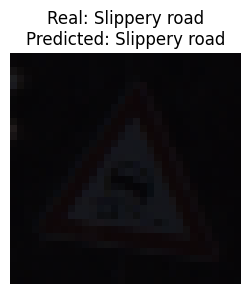

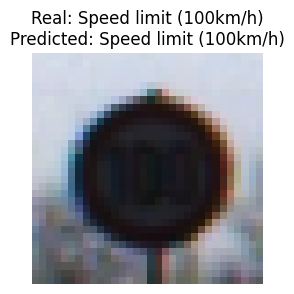

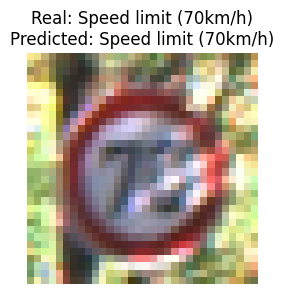

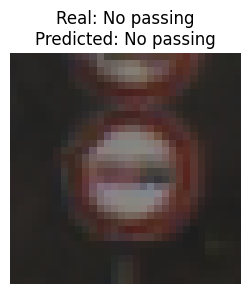

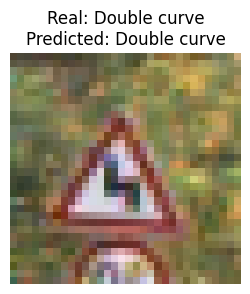

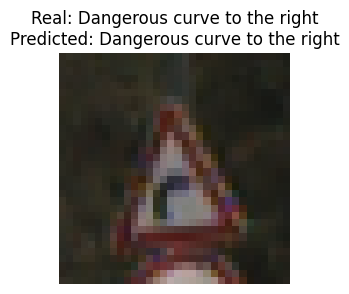

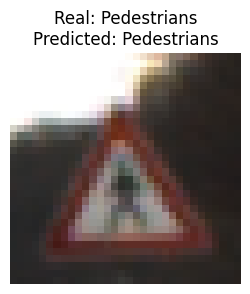

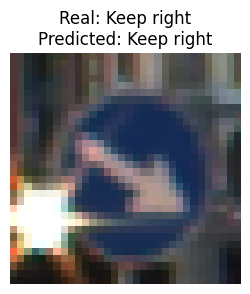

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test dataset
predictions = best_CNN_model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels to class names
predicted_classes = [sign_names[label] for label in predicted_labels]

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on test dataset: {:.2%}".format(accuracy))

# Visualize the test dataset with real and predicted labels
for i in range(20):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[i], cmap='gray')
    plt.title("Real: {}\nPredicted: {}".format(sign_names[np.argmax(y_test[i])], predicted_classes[i]))
    plt.axis('off')
    plt.show()
